In [ ]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 43.7 MB/s eta 0:00:00


In [ ]:
from googleapiclient.discovery import build
import csv
import os

def get_playlist_videos_api(playlist_id, api_key):
    """YouTube API kullanarak playlist videolarını çeker"""

    youtube = build('youtube', 'v3', developerKey=api_key)

    video_links = []
    next_page_token = None

    while True:
        # Playlist öğelerini al
        playlist_request = youtube.playlistItems().list(
            part='snippet,contentDetails',
            playlistId=playlist_id,
            maxResults=50,
            pageToken=next_page_token
        )

        playlist_response = playlist_request.execute()

        # Her video için bilgileri topla
        for item in playlist_response['items']:
            video_id = item['contentDetails']['videoId']
            video_title = item['snippet']['title']
            video_url = f"https://www.youtube.com/watch?v={video_id}"

            video_data = {
                'title': video_title,
                'video_id': video_id,
                'url': video_url
            }

            video_links.append(video_data)

        # Sonraki sayfa var mı kontrol et
        next_page_token = playlist_response.get('nextPageToken')
        if not next_page_token:
            break

    return video_links

# Kullanım
# api_key = os.getenv("YOUTUBE_API_KEY", "")
# playlist_id = 'PLnAF4npbrTwzO2W6v07ktEjBU6885k5hB'
# videos = get_playlist_videos_api(playlist_id, api_key)

In [ ]:
from googleapiclient.discovery import build
import csv
import os

# Load your API key from environment (YOUTUBE_API_KEY)
API_KEY = os.getenv("YOUTUBE_API_KEY", "")  # Set in env

def get_all_playlist_videos(playlist_id, api_key):
    youtube = build('youtube', 'v3', developerKey=api_key)

    videos = []
    next_page_token = None

    while True:
        request = youtube.playlistItems().list(
            part='snippet',
            playlistId=playlist_id,
            maxResults=50,
            pageToken=next_page_token
        )
        response = request.execute()

        for item in response['items']:
            video_id = item['snippet']['resourceId']['videoId']
            title = item['snippet']['title']

            videos.append({
                'title': title,
                'url': f'https://www.youtube.com/watch?v={video_id}'
            })

        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break

    return videos

# Usage
playlist_id = 'PLnAF4npbrTwzO2W6v07ktEjBU6885k5hB'
videos = get_all_playlist_videos(playlist_id, API_KEY)

# Save to CSV
with open('storybox_videos.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=['title', 'url'])
    writer.writeheader()
    writer.writerows(videos)

print(f"Total {len(videos)} videos found and saved.")

In [ ]:
from googleapiclient.discovery import build
import csv
import codecs
import os

# Load your API key from environment (YOUTUBE_API_KEY)
API_KEY = os.getenv("YOUTUBE_API_KEY", "")  # Set in env

def get_all_playlist_videos(playlist_id, api_key):
    youtube = build('youtube', 'v3', developerKey=api_key)

    videos = []
    next_page_token = None

    while True:
        request = youtube.playlistItems().list(
            part='snippet',
            playlistId=playlist_id,
            maxResults=50,
            pageToken=next_page_token
        )
        response = request.execute()

        for item in response['items']:
            video_id = item['snippet']['resourceId']['videoId']
            title = item['snippet']['title']

            videos.append({
                'title': title,
                'url': f'https://www.youtube.com/watch?v={video_id}'
            })

        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break

    return videos

# Usage
playlist_id = 'PLnAF4npbrTwzO2W6v07ktEjBU6885k5hB'
videos = get_all_playlist_videos(playlist_id, API_KEY)

# Method 1: UTF-8 with BOM (Excel için en iyi)
print("Saving with UTF-8 BOM (Excel compatible)...")
with open('storybox_videos_utf8_bom.csv', 'w', newline='', encoding='utf-8-sig') as f:
    writer = csv.DictWriter(f, fieldnames=['title', 'url'])
    writer.writeheader()
    writer.writerows(videos)

# Method 2: Pure UTF-8 (genel amaçlı)
print("Saving with UTF-8...")
with open('storybox_videos_utf8.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=['title', 'url'])
    writer.writeheader()
    writer.writerows(videos)

# Method 3: Windows-1254 (Türkçe Windows sistemleri için)
print("Saving with Windows-1254...")
try:
    with open('storybox_videos_win1254.csv', 'w', newline='', encoding='windows-1254') as f:
        writer = csv.DictWriter(f, fieldnames=['title', 'url'])
        writer.writeheader()
        writer.writerows(videos)
except UnicodeEncodeError as e:
    print(f"Windows-1254 encoding failed: {e}")
    print("Some characters cannot be encoded in Windows-1254")

# Method 4: Manual UTF-8 handling with error checking
print("Saving with manual UTF-8 handling...")
with open('storybox_videos_manual.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=['title', 'url'])
    writer.writeheader()

    for video in videos:
        try:
            # Clean and ensure proper encoding
            clean_title = video['title'].encode('utf-8').decode('utf-8')
            writer.writerow({
                'title': clean_title,
                'url': video['url']
            })
        except UnicodeError as e:
            print(f"Encoding error for video: {video['title'][:50]}... - {e}")
            # Write with replacement characters
            writer.writerow({
                'title': video['title'].encode('utf-8', errors='replace').decode('utf-8'),
                'url': video['url']
            })

print(f"Total {len(videos)} videos found and saved in multiple formats.")
print("\nFile formats created:")
print("1. storybox_videos_utf8_bom.csv - Excel için en uygun (UTF-8 with BOM)")
print("2. storybox_videos_utf8.csv - Genel kullanım (Pure UTF-8)")
print("3. storybox_videos_win1254.csv - Windows Türkçe sistemi")
print("4. storybox_videos_manual.csv - Manuel encoding kontrolü")

# Bonus: Test function to verify encoding
def test_turkish_characters():
    test_chars = "çğıöşüÇĞIÖŞÜ"
    print(f"\nTesting Turkish characters: {test_chars}")

    # Test each encoding
    encodings = ['utf-8', 'utf-8-sig', 'windows-1254', 'iso-8859-9']

    for encoding in encodings:
        try:
            encoded = test_chars.encode(encoding)
            decoded = encoded.decode(encoding)
            status = "✓ OK" if decoded == test_chars else "✗ FAILED"
            print(f"{encoding}: {status}")
        except Exception as e:
            print(f"{encoding}: ✗ ERROR - {e}")

# Run the test
test_turkish_characters()

Saving with UTF-8 BOM (Excel compatible)...
Saving with UTF-8...
Saving with Windows-1254...
Saving with manual UTF-8 handling...
Total 190 videos found and saved in multiple formats.

File formats created:
1. storybox_videos_utf8_bom.csv - Excel için en uygun (UTF-8 with BOM)
2. storybox_videos_utf8.csv - Genel kullanım (Pure UTF-8)
3. storybox_videos_win1254.csv - Windows Türkçe sistemi
4. storybox_videos_manual.csv - Manuel encoding kontrolü

Testing Turkish characters: çğıöşüÇĞIÖŞÜ
utf-8: ✓ OK
utf-8-sig: ✓ OK
windows-1254: ✓ OK
iso-8859-9: ✓ OK


In [ ]:
!pip install youtube-transcript-api
!pip install openai
!pip install googletrans==4.0.0rc1
!pip install nltk

In [ ]:
!pip install youtube-transcript-api
!pip install googletrans==4.0.0rc1
!pip install openai  # (opsiyonel - daha iyi özetler için)
!pip install pandas

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=ca67f25f199fcb214f2e8409ee050132162dcb8dd81a5d1e9994076be1945aa4
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: h11
    Found existing installation: h11 0.9.0
    Uninstalling h11-0.9.0:
      Successfully uninstalled h11-0.9.0
  Attempting uninstall: httpcore
    Found existing installation: httpcore 0.9.1
    Uninstalling httpcore-0.9.1:
      Successfully uninstalled httpcore-0.9.1
  Attempting uninstall: httpx
    Found existing installation: httpx 0.13.3
    Uninstalling httpx-0.13.3:
      Successfully uninstalled httpx-0.13.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googletrans 4.0.0rc1 requires httpx==0.13.3, but you have httpx 0.28.1 which is incompatible.


ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
^C


In [ ]:
!pip uninstall googletrans
!pip install youtube-transcript-api
!pip install deep-translator
!pip install pandas
!pip install requests
!pip install openai  # (opsiyonel)

In [ ]:
import pandas as pd
import csv
import requests
import time
import re
from urllib.parse import urlparse, parse_qs
import os

# Required installations:
# pip install youtube-transcript-api
# pip install openai
# pip install googletrans==4.0.0rc1
# pip install nltk

try:
    from youtube_transcript_api import YouTubeTranscriptApi
    from youtube_transcript_api.formatters import TextFormatter
except ImportError:
    print("⚠️  youtube-transcript-api not installed. Install with: pip install youtube-transcript-api")

try:
    import openai
except ImportError:
    print("⚠️  openai not installed. Install with: pip install openai")

try:
    from googletrans import Translator
except ImportError:
    print("⚠️  googletrans not installed. Install with: pip install googletrans==4.0.0rc1")

class YouTubeVideoAnalyzer:
    def __init__(self, openai_api_key=None):
        self.openai_api_key = openai_api_key
        if openai_api_key:
            openai.api_key = openai_api_key
        self.translator = None
        try:
            self.translator = Translator()
        except:
            print("⚠️  Google Translator initialization failed")

    def extract_video_id(self, url):
        """YouTube URL'den video ID'sini çıkar"""
        try:
            if 'youtube.com/watch?v=' in url:
                return url.split('watch?v=')[1].split('&')[0]
            elif 'youtu.be/' in url:
                return url.split('youtu.be/')[1].split('?')[0]
            else:
                return None
        except:
            return None

    def get_transcript(self, video_id, languages=['tr', 'en', 'auto']):
        """Video'nun transcript'ini al"""
        try:
            # Önce Türkçe, sonra İngilizce, son olarak otomatik
            transcript_list = YouTubeTranscriptApi.list_transcripts(video_id)

            transcript = None
            used_language = None

            # Öncelik sırasına göre transcript'i bul
            for lang in languages:
                try:
                    if lang == 'auto':
                        # Otomatik oluşturulmuş herhangi bir dili al
                        for available_transcript in transcript_list:
                            if available_transcript.is_generated:
                                transcript = available_transcript.fetch()
                                used_language = available_transcript.language_code
                                break
                    else:
                        transcript = transcript_list.find_transcript([lang]).fetch()
                        used_language = lang

                    if transcript:
                        break
                except:
                    continue

            if not transcript:
                return None, None, None

            # Transcript'i metne dönüştür
            formatter = TextFormatter()
            text_transcript = formatter.format_transcript(transcript)

            # Temizle
            text_transcript = re.sub(r'\[.*?\]', '', text_transcript)  # [Music] gibi notları kaldır
            text_transcript = ' '.join(text_transcript.split())  # Fazla boşlukları temizle

            return text_transcript, used_language, len(text_transcript)

        except Exception as e:
            print(f"❌ Transcript error for {video_id}: {str(e)[:100]}")
            return None, None, 0

    def summarize_text_openai(self, text, max_length=500, language='turkish'):
        """OpenAI ile metin özetleme"""
        if not self.openai_api_key:
            return self.summarize_text_simple(text, max_length)

        try:
            prompt = f"""
            Aşağıdaki metni {language} dilinde özetle. Özet maksimum {max_length} karakter olmalı ve ana konuları kapsamalı:

            {text[:4000]}  # OpenAI token limitini aşmamak için
            """

            response = openai.ChatCompletion.create(
                model="gpt-3.5-turbo",
                messages=[{"role": "user", "content": prompt}],
                max_tokens=max_length//3,  # Yaklaşık karakter/token oranı
                temperature=0.7
            )

            return response.choices[0].message.content.strip()

        except Exception as e:
            print(f"⚠️  OpenAI summarization failed: {e}")
            return self.summarize_text_simple(text, max_length)

    def summarize_text_simple(self, text, max_length=500):
        """Basit özetleme algoritması"""
        if not text:
            return ""

        sentences = text.split('. ')

        if len(text) <= max_length:
            return text

        # En önemli cümleleri seç (başlangıç, ortalar ve sonlar)
        total_sentences = len(sentences)
        important_indices = []

        # İlk %20'yi al
        start_count = max(1, total_sentences // 5)
        important_indices.extend(range(start_count))

        # Orta %20'yi al
        middle_start = total_sentences // 2 - start_count // 2
        important_indices.extend(range(middle_start, middle_start + start_count))

        # Son %20'yi al
        important_indices.extend(range(total_sentences - start_count, total_sentences))

        # Tekrarları kaldır ve sıra
        important_indices = sorted(list(set(important_indices)))

        summary_sentences = [sentences[i] for i in important_indices if i < len(sentences)]
        summary = '. '.join(summary_sentences)

        # Uzunluk kontrolü
        if len(summary) > max_length:
            summary = summary[:max_length].rsplit(' ', 1)[0] + '...'

        return summary

    def translate_text(self, text, target_language='en'):
        """Metni çevir"""
        if not self.translator or not text:
            return text

        try:
            result = self.translator.translate(text, dest=target_language)
            return result.text
        except Exception as e:
            print(f"⚠️  Translation failed: {e}")
            return text

    def analyze_single_video(self, url, video_title=""):
        """Tek bir video'yu analiz et"""
        print(f"🎬 Analyzing: {video_title[:50]}...")

        video_id = self.extract_video_id(url)
        if not video_id:
            return {
                'Video_URL': url,
                'Video_Title': video_title,
                'Transcript': 'ERROR: Invalid URL',
                'Summary': 'ERROR: Invalid URL',
                'Summary_English': 'ERROR: Invalid URL',
                'karakter_sayisi': 0,
                'Transcript_English': 'ERROR: Invalid URL',
                'Status': 'FAILED'
            }

        # Transcript'i al
        transcript, lang_used, char_count = self.get_transcript(video_id)

        if not transcript:
            return {
                'Video_URL': url,
                'Video_Title': video_title,
                'Transcript': 'ERROR: No transcript available',
                'Summary': 'ERROR: No transcript available',
                'Summary_English': 'ERROR: No transcript available',
                'karakter_sayisi': 0,
                'Transcript_English': 'ERROR: No transcript available',
                'Status': 'NO_TRANSCRIPT'
            }

        print(f"   ✓ Transcript found ({lang_used}, {char_count} chars)")

        # Özet oluştur (Türkçe)
        summary_tr = self.summarize_text_openai(transcript, 500, 'turkish')
        print(f"   ✓ Turkish summary created")

        # İngilizce özet
        summary_en = self.translate_text(summary_tr, 'en')
        print(f"   ✓ English summary created")

        # Transcript'i İngilizce'ye çevir (uzun metinler için parça parça)
        transcript_en = self.translate_long_text(transcript)
        print(f"   ✓ English transcript created")

        return {
            'Video_URL': url,
            'Video_Title': video_title,
            'Transcript': transcript,
            'Summary': summary_tr,
            'Summary_English': summary_en,
            'karakter_sayisi': char_count,
            'Transcript_English': transcript_en,
            'Status': 'SUCCESS'
        }

    def translate_long_text(self, text, chunk_size=1000):
        """Uzun metinleri parça parça çevir"""
        if not text:
            return ""

        if len(text) <= chunk_size:
            return self.translate_text(text, 'en')

        chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]
        translated_chunks = []

        for i, chunk in enumerate(chunks):
            translated = self.translate_text(chunk, 'en')
            translated_chunks.append(translated)
            if i % 3 == 0:  # Rate limiting
                time.sleep(1)

        return ' '.join(translated_chunks)

    def analyze_csv_videos(self, csv_file, output_file='analyzed_videos.csv', openai_key=None, start_from=0):
        """CSV dosyasındaki tüm videoları analiz et"""

        if openai_key:
            self.openai_api_key = openai_key
            openai.api_key = openai_key

        # CSV dosyasını oku
        try:
            df = pd.read_csv(csv_file, encoding='utf-8-sig')
            print(f"📂 Loaded {len(df)} videos from {csv_file}")
        except Exception as e:
            print(f"❌ Error reading CSV: {e}")
            return

        # Sütun isimlerini kontrol et
        url_column = None
        title_column = None

        for col in df.columns:
            if 'url' in col.lower():
                url_column = col
            if 'title' in col.lower() or 'başlık' in col.lower():
                title_column = col

        if not url_column:
            print("❌ URL sütunu bulunamadı!")
            return

        results = []

        print(f"🚀 Starting analysis from video #{start_from + 1}")
        print("="*60)

        for index, row in df.iterrows():
            if index < start_from:
                continue

            url = row[url_column]
            title = row[title_column] if title_column else f"Video {index + 1}"

            print(f"\n📊 Progress: {index + 1}/{len(df)}")

            try:
                result = self.analyze_single_video(url, title)
                results.append(result)

                # Her 5 videoda bir ara kayıt
                if (index + 1) % 5 == 0:
                    temp_df = pd.DataFrame(results)
                    temp_df.to_csv(f"temp_{output_file}", encoding='utf-8-sig', index=False)
                    print(f"   💾 Temporary save: temp_{output_file}")

                # Rate limiting
                time.sleep(2)

            except KeyboardInterrupt:
                print(f"\n⏹️  Process interrupted at video {index + 1}")
                break
            except Exception as e:
                print(f"❌ Error processing video {index + 1}: {e}")
                results.append({
                    'Video_URL': url,
                    'Video_Title': title,
                    'Transcript': f'ERROR: {str(e)}',
                    'Summary': f'ERROR: {str(e)}',
                    'Summary_English': f'ERROR: {str(e)}',
                    'karakter_sayisi': 0,
                    'Transcript_English': f'ERROR: {str(e)}',
                    'Status': 'ERROR'
                })

        # Final save
        if results:
            final_df = pd.DataFrame(results)
            final_df.to_csv(output_file, encoding='utf-8-sig', index=False)
            print(f"\n✅ Analysis complete! Results saved to: {output_file}")

            # İstatistikler
            success_count = len([r for r in results if r['Status'] == 'SUCCESS'])
            print(f"📊 Statistics:")
            print(f"   Total videos: {len(results)}")
            print(f"   Successful: {success_count}")
            print(f"   Failed: {len(results) - success_count}")
        else:
            print("❌ No results to save")

# Kullanım örneği ve test
def main():
    print("🎯 YouTube Video Comprehensive Analyzer")
    print("="*50)

    # Yapılandırma
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY", "")  # Optional
    CSV_FILE = 'storybox_videos_utf8_bom.csv'  # Giriş CSV dosyası
    OUTPUT_FILE = 'analyzed_storybox_videos.csv'  # Çıkış dosyası
    START_FROM = 0  # Hangi videodan başlamak istiyorsanız (0 = baştan)

    # Analyzer'ı başlat
    analyzer = YouTubeVideoAnalyzer(openai_api_key=OPENAI_API_KEY)

    # Test - tek video
    print("🧪 Testing with single video...")
    test_url = "https://www.youtube.com/watch?v=Xpq4WszuoCc"
    test_result = analyzer.analyze_single_video(test_url, "Test Video")

    if test_result['Status'] == 'SUCCESS':
        print("✅ Single video test successful!")
        print(f"   Transcript length: {test_result['karakter_sayisi']} chars")
        print(f"   Summary preview: {test_result['Summary'][:100]}...")
    else:
        print(f"❌ Single video test failed: {test_result['Status']}")

    # CSV dosyasının tamamını analiz et
    print(f"\n🚀 Starting batch analysis...")
    user_input = input("Continue with full CSV analysis? (y/n): ").strip().lower()

    if user_input == 'y':
        analyzer.analyze_csv_videos(
            csv_file=CSV_FILE,
            output_file=OUTPUT_FILE,
            openai_key=OPENAI_API_KEY,
            start_from=START_FROM
        )
    else:
        print("Analysis cancelled.")

if __name__ == "__main__":
    main()

⚠️  googletrans not installed. Install with: pip install googletrans==4.0.0rc1
🎯 YouTube Video Comprehensive Analyzer
⚠️  Google Translator initialization failed
🧪 Testing with single video...
🎬 Analyzing: Test Video...
   ✓ Transcript found (tr, 11387 chars)
⚠️  OpenAI summarization failed: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742

   ✓ Turkish summary created
   ✓ English summary created
   ✓ English transcript created
✅ Single video test successful!
   Transcript length: 11387 chars
   Summary preview: Hayal ettiğimiz süreç şu. Robot kol elini uzatacak. Bir insan el

In [ ]:
!pip install openai>=1.0.0
!pip install youtube-transcript-api
!pip install deep-translator
!pip install pandas requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.7/485.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import csv
import requests
import time
import re
from urllib.parse import urlparse, parse_qs
import os

# Required installations:
# pip install youtube-transcript-api
# pip install openai>=1.0.0
# pip install deep-translator
# pip install requests

try:
    from youtube_transcript_api import YouTubeTranscriptApi
    from youtube_transcript_api.formatters import TextFormatter
    print("✅ YouTube Transcript API loaded")
except ImportError:
    print("❌ youtube-transcript-api not installed. Install with: pip install youtube-transcript-api")

try:
    from openai import OpenAI
    OPENAI_AVAILABLE = True
    print("✅ OpenAI API loaded (v1.0+)")
except ImportError:
    print("❌ openai not installed. Install with: pip install openai>=1.0.0")
    OPENAI_AVAILABLE = False

# Alternative translator that works better
try:
    from deep_translator import GoogleTranslator
    TRANSLATOR_AVAILABLE = True
    print("✅ Deep Translator loaded")
except ImportError:
    print("❌ deep-translator not installed. Install with: pip install deep-translator")
    TRANSLATOR_AVAILABLE = False

class YouTubeVideoAnalyzer:
    def __init__(self, openai_api_key=None):
        self.openai_api_key = openai_api_key
        self.openai_client = None

        if openai_api_key and OPENAI_AVAILABLE:
            try:
                self.openai_client = OpenAI(api_key=openai_api_key)
                print("✅ OpenAI client initialized")
            except Exception as e:
                print(f"⚠️  OpenAI client initialization failed: {e}")

        # Initialize translator
        self.translator_available = TRANSLATOR_AVAILABLE
        if not TRANSLATOR_AVAILABLE:
            print("⚠️  Translator not available - translations will be skipped")

    def extract_video_id(self, url):
        """YouTube URL'den video ID'sini çıkar"""
        try:
            if 'youtube.com/watch?v=' in url:
                return url.split('watch?v=')[1].split('&')[0]
            elif 'youtu.be/' in url:
                return url.split('youtu.be/')[1].split('?')[0]
            else:
                return None
        except:
            return None

    def get_transcript_advanced(self, video_id):
        """Gelişmiş transcript alma - çoklu strateji"""
        try:
            # Mevcut transcript'leri listele
            transcript_list = YouTubeTranscriptApi.list_transcripts(video_id)

            transcript = None
            used_language = None
            is_auto_generated = False

            # Strateji 1: Manuel Türkçe transcript
            try:
                manual_tr = transcript_list.find_transcript(['tr'])
                if not manual_tr.is_generated:
                    transcript = manual_tr.fetch()
                    used_language = 'tr (manual)'
                    print(f"   📝 Found manual Turkish transcript")
            except:
                pass

            # Strateji 2: Manuel İngilizce transcript
            if not transcript:
                try:
                    manual_en = transcript_list.find_transcript(['en'])
                    if not manual_en.is_generated:
                        transcript = manual_en.fetch()
                        used_language = 'en (manual)'
                        print(f"   📝 Found manual English transcript")
                except:
                    pass

            # Strateji 3: Otomatik Türkçe
            if not transcript:
                try:
                    auto_tr = transcript_list.find_transcript(['tr'])
                    transcript = auto_tr.fetch()
                    used_language = 'tr (auto)'
                    is_auto_generated = True
                    print(f"   🤖 Found auto-generated Turkish transcript")
                except:
                    pass

            # Strateji 4: Otomatik İngilizce
            if not transcript:
                try:
                    auto_en = transcript_list.find_transcript(['en'])
                    transcript = auto_en.fetch()
                    used_language = 'en (auto)'
                    is_auto_generated = True
                    print(f"   🤖 Found auto-generated English transcript")
                except:
                    pass

            # Strateji 5: Mevcut herhangi bir dil
            if not transcript:
                try:
                    available_transcripts = list(transcript_list)
                    if available_transcripts:
                        first_available = available_transcripts[0]
                        transcript = first_available.fetch()
                        used_language = f"{first_available.language_code} (fallback)"
                        is_auto_generated = first_available.is_generated
                        print(f"   🌐 Found fallback transcript: {first_available.language_code}")
                except:
                    pass

            # Strateji 6: Translatable transcript
            if not transcript:
                try:
                    for available_transcript in transcript_list:
                        try:
                            # Try to translate to Turkish
                            transcript = available_transcript.translate('tr').fetch()
                            used_language = f"{available_transcript.language_code} → tr (translated)"
                            is_auto_generated = True
                            print(f"   🔄 Translated {available_transcript.language_code} to Turkish")
                            break
                        except:
                            continue
                except:
                    pass

            if not transcript:
                return None, None, 0, False

            # Transcript'i metne dönüştür
            formatter = TextFormatter()
            text_transcript = formatter.format_transcript(transcript)

            # Temizle
            text_transcript = re.sub(r'\[.*?\]', '', text_transcript)  # [Music] vb. kaldır
            text_transcript = re.sub(r'\(.*?\)', '', text_transcript)  # (Applause) vb. kaldır
            text_transcript = ' '.join(text_transcript.split())  # Fazla boşlukları temizle

            return text_transcript, used_language, len(text_transcript), is_auto_generated

        except Exception as e:
            print(f"   ❌ All transcript strategies failed: {str(e)[:100]}")
            return None, None, 0, False

    def summarize_text_openai_v1(self, text, max_length=500, language='turkish'):
        """OpenAI v1.0+ ile metin özetleme"""
        if not self.openai_client:
            return self.summarize_text_simple(text, max_length)

        try:
            system_message = f"""Sen bir metin özetleme uzmanısın.
            Verilen metni {language} dilinde, maksimum {max_length} karakter ile özetle.
            Ana konuları ve önemli noktaları kapsayan, akıcı bir özet yaz."""

            user_message = f"Bu metni özetle:\n\n{text[:8000]}"  # Token limit için kısıtla

            response = self.openai_client.chat.completions.create(
                model="gpt-3.5-turbo",
                messages=[
                    {"role": "system", "content": system_message},
                    {"role": "user", "content": user_message}
                ],
                max_tokens=int(max_length/2),  # Yaklaşık karakter/token oranı
                temperature=0.7
            )

            summary = response.choices[0].message.content.strip()

            # Uzunluk kontrolü
            if len(summary) > max_length:
                summary = summary[:max_length].rsplit(' ', 1)[0] + '...'

            return summary

        except Exception as e:
            print(f"   ⚠️  OpenAI summarization failed: {e}")
            return self.summarize_text_simple(text, max_length)

    def summarize_text_simple(self, text, max_length=500):
        """Gelişmiş basit özetleme algoritması"""
        if not text:
            return ""

        if len(text) <= max_length:
            return text

        # Cümlelere ayır
        sentences = text.replace('!', '.').replace('?', '.').split('. ')
        sentences = [s.strip() for s in sentences if len(s.strip()) > 10]

        if len(sentences) <= 3:
            return '. '.join(sentences)

        # Anahtar kelime skorlaması
        word_freq = {}
        for sentence in sentences:
            words = sentence.lower().split()
            for word in words:
                if len(word) > 3:  # Kısa kelimeleri atla
                    word_freq[word] = word_freq.get(word, 0) + 1

        # Cümle skorları
        sentence_scores = []
        for i, sentence in enumerate(sentences):
            score = 0
            words = sentence.lower().split()

            # Kelime frekans skoru
            for word in words:
                if word in word_freq:
                    score += word_freq[word]

            # Pozisyon skoru (başlangıç ve son önemli)
            if i < len(sentences) * 0.2:  # İlk %20
                score *= 1.5
            elif i > len(sentences) * 0.8:  # Son %20
                score *= 1.3

            # Uzunluk skoru (çok kısa çok uzun cümleler cezalandırılıyor)
            word_count = len(words)
            if 10 <= word_count <= 30:
                score *= 1.2
            elif word_count < 5:
                score *= 0.5

            sentence_scores.append((score, i, sentence))

        # En yüksek skorlu cümleleri seç
        sentence_scores.sort(reverse=True)
        selected_sentences = []
        current_length = 0

        for score, index, sentence in sentence_scores:
            if current_length + len(sentence) <= max_length - 50:  # Biraz margin bırak
                selected_sentences.append((index, sentence))
                current_length += len(sentence)

            if len(selected_sentences) >= min(5, len(sentences) // 2):
                break

        # Orijinal sıraya göre düzenle
        selected_sentences.sort(key=lambda x: x[0])
        summary = '. '.join([sentence for _, sentence in selected_sentences])

        # Son kontrol
        if len(summary) > max_length:
            summary = summary[:max_length].rsplit(' ', 1)[0] + '...'

        return summary

    def translate_text(self, text, target_language='en'):
        """Metni çevir - Updated with deep-translator"""
        if not self.translator_available or not text:
            return self.translate_text_simple(text, target_language)

        try:
            # Use deep-translator which is more stable
            translator = GoogleTranslator(source='auto', target=target_language)

            # Handle long texts by splitting
            if len(text) > 4500:  # Google Translate limit
                sentences = text.split('. ')
                translated_sentences = []
                current_chunk = ""

                for sentence in sentences:
                    if len(current_chunk + sentence) < 4500:
                        current_chunk += sentence + ". "
                    else:
                        if current_chunk:
                            translated = translator.translate(current_chunk.strip())
                            translated_sentences.append(translated)
                        current_chunk = sentence + ". "
                        time.sleep(0.1)  # Rate limiting

                # Translate remaining chunk
                if current_chunk:
                    translated = translator.translate(current_chunk.strip())
                    translated_sentences.append(translated)

                return ' '.join(translated_sentences)
            else:
                result = translator.translate(text)
                return result

        except Exception as e:
            print(f"   ⚠️  Translation failed, using backup: {e}")
            return self.translate_text_simple(text, target_language)

    def translate_text_simple(self, text, target_language='en'):
        """Basit çeviri alternatifi - API kullanarak"""
        if not text:
            return text

        try:
            # Alternative free translation using mymemory API
            import requests
            import urllib.parse

            # Limit text length for free API
            if len(text) > 500:
                text = text[:500] + "..."

            url = f"https://api.mymemory.translated.net/get"
            params = {
                'q': text,
                'langpair': f'tr|{target_language}'
            }

            response = requests.get(url, params=params, timeout=10)
            time.sleep(0.5)  # Rate limiting

            if response.status_code == 200:
                data = response.json()
                if 'responseData' in data and 'translatedText' in data['responseData']:
                    return data['responseData']['translatedText']

            return text

        except Exception as e:
            print(f"   ⚠️  Simple translation failed: {e}")
            return text

    def translate_long_text(self, text, chunk_size=1000):
        """Uzun metinleri parça parça çevir"""
        if not text:
            return ""

        if len(text) <= chunk_size:
            return self.translate_text(text, 'en')

        chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]
        translated_chunks = []

        for i, chunk in enumerate(chunks):
            translated = self.translate_text(chunk, 'en')
            translated_chunks.append(translated)
            if i % 2 == 0:  # Rate limiting
                time.sleep(1)

        return ' '.join(translated_chunks)

    def analyze_single_video(self, url, video_title=""):
        """Tek bir video'yu analiz et - iyileştirilmiş"""
        print(f"🎬 Analyzing: {video_title[:50]}...")

        video_id = self.extract_video_id(url)
        if not video_id:
            return {
                'Video_URL': url,
                'Video_Title': video_title,
                'Transcript': 'ERROR: Invalid YouTube URL format',
                'Summary': 'ERROR: Invalid YouTube URL format',
                'Summary_English': 'ERROR: Invalid YouTube URL format',
                'karakter_sayisi': 0,
                'Transcript_English': 'ERROR: Invalid YouTube URL format',
                'Status': 'INVALID_URL'
            }

        # Transcript'i al - gelişmiş yöntemle
        transcript, lang_used, char_count, is_auto = self.get_transcript_advanced(video_id)

        if not transcript:
            return {
                'Video_URL': url,
                'Video_Title': video_title,
                'Transcript': 'ERROR: No transcript available (checked all methods)',
                'Summary': 'ERROR: No transcript available',
                'Summary_English': 'ERROR: No transcript available',
                'karakter_sayisi': 0,
                'Transcript_English': 'ERROR: No transcript available',
                'Status': 'NO_TRANSCRIPT'
            }

        print(f"   ✓ Transcript found ({lang_used}, {char_count} chars)")

        # Özet oluştur (Türkçe)
        summary_tr = self.summarize_text_openai_v1(transcript, 500, 'turkish')
        print(f"   ✓ Turkish summary created")

        # İngilizce özet
        summary_en = self.translate_text(summary_tr, 'en')
        print(f"   ✓ English summary created")

        # Transcript'i İngilizce'ye çevir (uzun metinler için parça parça)
        transcript_en = self.translate_long_text(transcript)
        print(f"   ✓ English transcript created")

        return {
            'Video_URL': url,
            'Video_Title': video_title,
            'Transcript': transcript,
            'Summary': summary_tr,
            'Summary_English': summary_en,
            'karakter_sayisi': char_count,
            'Transcript_English': transcript_en,
            'Status': 'SUCCESS',
            'Transcript_Source': lang_used
        }

    def analyze_csv_videos(self, csv_file, output_file='analyzed_videos.csv', openai_key=None, start_from=0):
        """CSV dosyasındaki tüm videoları analiz et - iyileştirilmiş"""

        if openai_key and OPENAI_AVAILABLE:
            try:
                self.openai_client = OpenAI(api_key=openai_key)
                print("✅ OpenAI client updated with new key")
            except Exception as e:
                print(f"⚠️  OpenAI client update failed: {e}")

        # CSV dosyasını oku
        try:
            df = pd.read_csv(csv_file, encoding='utf-8-sig')
            print(f"📂 Loaded {len(df)} videos from {csv_file}")
        except Exception as e:
            print(f"❌ Error reading CSV: {e}")
            return

        # Sütun isimlerini kontrol et
        url_column = None
        title_column = None

        for col in df.columns:
            if 'url' in col.lower():
                url_column = col
            if 'title' in col.lower() or 'başlık' in col.lower():
                title_column = col

        if not url_column:
            print("❌ URL sütunu bulunamadı!")
            return

        results = []
        success_count = 0

        print(f"🚀 Starting analysis from video #{start_from + 1}")
        print("="*60)

        for index, row in df.iterrows():
            if index < start_from:
                continue

            url = row[url_column]
            title = row[title_column] if title_column else f"Video {index + 1}"

            print(f"\n📊 Progress: {index + 1}/{len(df)}")

            try:
                result = self.analyze_single_video(url, title)
                results.append(result)

                if result['Status'] == 'SUCCESS':
                    success_count += 1

                # Her 5 videoda bir ara kayıt
                if (index + 1) % 5 == 0:
                    temp_df = pd.DataFrame(results)
                    temp_df.to_csv(f"temp_{output_file}", encoding='utf-8-sig', index=False)
                    print(f"   💾 Temporary save: temp_{output_file} (Success: {success_count}/{len(results)})")

                # Rate limiting
                time.sleep(3)  # Biraz daha uzun bekle

            except KeyboardInterrupt:
                print(f"\n⏹️  Process interrupted at video {index + 1}")
                break
            except Exception as e:
                print(f"   ❌ Error processing video {index + 1}: {e}")
                results.append({
                    'Video_URL': url,
                    'Video_Title': title,
                    'Transcript': f'ERROR: {str(e)}',
                    'Summary': f'ERROR: {str(e)}',
                    'Summary_English': f'ERROR: {str(e)}',
                    'karakter_sayisi': 0,
                    'Transcript_English': f'ERROR: {str(e)}',
                    'Status': 'ERROR'
                })

        # Final save
        if results:
            final_df = pd.DataFrame(results)
            final_df.to_csv(output_file, encoding='utf-8-sig', index=False)
            print(f"\n✅ Analysis complete! Results saved to: {output_file}")

            # Detaylı istatistikler
            status_counts = {}
            for result in results:
                status = result['Status']
                status_counts[status] = status_counts.get(status, 0) + 1

            print(f"📊 Final Statistics:")
            print(f"   Total videos processed: {len(results)}")
            for status, count in status_counts.items():
                print(f"   {status}: {count}")

            # Başarı oranı
            success_rate = (status_counts.get('SUCCESS', 0) / len(results)) * 100
            print(f"   Success rate: {success_rate:.1f}%")
        else:
            print("❌ No results to save")

# Kullanım örneği ve test
def main():
    print("🎯 YouTube Video Comprehensive Analyzer v2.0")
    print("="*50)

    # Yapılandırma
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY", "")  # Optional
    CSV_FILE = 'storybox_videos_utf8_bom.csv'  # Giriş CSV dosyası
    OUTPUT_FILE = 'analyzed_storybox_videos_v2.csv'  # Çıkış dosyası
    START_FROM = 0  # Hangi videodan başlamak istiyorsanız (0 = baştan)

    # Analyzer'ı başlat
    analyzer = YouTubeVideoAnalyzer(openai_api_key=OPENAI_API_KEY)

    # Test - tek video
    print("🧪 Testing with single video...")
    test_url = "https://www.youtube.com/watch?v=Xpq4WszuoCc"
    test_result = analyzer.analyze_single_video(test_url, "Test Video")

    print(f"Test result status: {test_result['Status']}")
    if test_result['Status'] == 'SUCCESS':
        print("✅ Single video test successful!")
        print(f"   Transcript length: {test_result['karakter_sayisi']} chars")
        print(f"   Transcript source: {test_result.get('Transcript_Source', 'unknown')}")
        print(f"   Summary preview: {test_result['Summary'][:100]}...")
    else:
        print(f"❌ Single video test failed: {test_result['Status']}")
        print(f"   Error: {test_result['Transcript']}")

    # CSV dosyasının tamamını analiz et
    print(f"\n🚀 Starting batch analysis...")
    user_input = input("Continue with full CSV analysis? (y/n): ").strip().lower()

    if user_input == 'y':
        analyzer.analyze_csv_videos(
            csv_file=CSV_FILE,
            output_file=OUTPUT_FILE,
            openai_key=OPENAI_API_KEY,
            start_from=START_FROM
        )
    else:
        print("Analysis cancelled.")

if __name__ == "__main__":
    main()

❌ youtube-transcript-api not installed. Install with: pip install youtube-transcript-api
✅ OpenAI API loaded (v1.0+)
❌ deep-translator not installed. Install with: pip install deep-translator
🎯 YouTube Video Comprehensive Analyzer v2.0
✅ OpenAI client initialized
⚠️  Translator not available - translations will be skipped
🧪 Testing with single video...
🎬 Analyzing: Test Video...
   ❌ All transcript strategies failed: name 'YouTubeTranscriptApi' is not defined
Test result status: NO_TRANSCRIPT
❌ Single video test failed: NO_TRANSCRIPT
   Error: ERROR: No transcript available (checked all methods)

🚀 Starting batch analysis...
Continue with full CSV analysis? (y/n): y
✅ OpenAI client updated with new key
❌ Error reading CSV: [Errno 2] No such file or directory: 'storybox_videos_utf8_bom.csv'


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.7 MB/s eta 0:00:00
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=451f0f75624259760da70043ade289476563160aebfadc0f8f9796f3fb0f13cc
  Stored i

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

=== 🔍 K-MEANS ANALİZ ===


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


📊 K-Means ile kümeleme...
Silhouette Skoru: 0.395


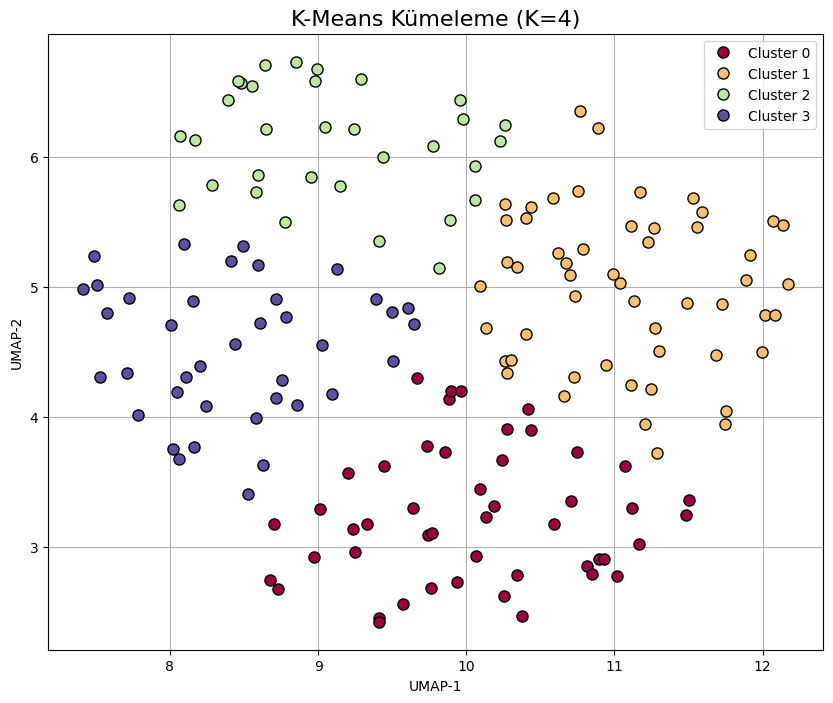


Cluster Distribution:
cluster
1    53
0    48
3    39
2    32
Name: count, dtype: int64

📌 Küme Temaları (Anahtar Kelimeler):
Küme 0: ['ve', 'bir', 'bu', 'olduğunu', 'ayrıca']
Küme 1: ['ve', 'bir', 'yılında', 'sonra', 'başladı']
Küme 2: ['ve', 'bir', 'şirket', 'şirketin', 'yılında']
Küme 3: ['ve', 'bir', 'yılında', 'sonra', 'başladı']

📌 Küme Örnekleri:

--- Küme 0 Örnekleri (48 öğe) ---
- Bu metin, bir kişinin hayatındaki dönüm noktalarını ve kariyerini anlatıyor. Kişi, 14 yıllık bir ajans tecrübesinden sonra hayatını değiştirmeye karar...
- Sertaç, Dubai'de çalışırken kurumsal hayatın kendisine keyif vermediğini ve özgür olmak istediğini fark etti. 2012 yılında Singapur'da çalışırken, dün...
- Türkay Gülhan, Aerofix markasının sahibi ve CEO'su olarak, hayat hikayesini ve iş deneyimlerini paylaşıyor. İlkokul yıllarında farklı illerde okuyan G...

--- Küme 1 Örnekleri (53 öğe) ---
- Osman İpek, Rubenis Tekstil Sanayi Ticaret Anonim Şirketi'nin yönetim kurulu başkanıdır. Ağrı'da doğan 

In [2]:
# Install all required packages first
!pip install minisom hdbscan umap-learn sentence-transformers transformers torch openpyxl

# All imports are now grouped after the installation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import hdbscan
import umap
from sentence_transformers import SentenceTransformer
from collections import Counter
from transformers import pipeline, logging

# Suppress verbose logging from transformers
logging.set_verbosity_error()

class VideoThemeCluster:
    # Corrected the constructor from _init_ to __init__
    def __init__(self):
        self.model = SentenceTransformer('all-MiniLM-L6-v2')
        self.text2text_model = pipeline("text2text-generation", model="google/flan-t5-base")

    def load_data(self, file_path="Helsinki_Opus_Transcript.xlsx"):
        df = pd.read_excel(file_path)
        return df[["Video URL", "Transcript", "Summary"]]

    def embed_text(self, texts):
        return self.model.encode(texts, show_progress_bar=True)

    def reduce_umap(self, embeddings):
        reducer = umap.UMAP(n_components=2, random_state=42)
        return reducer.fit_transform(embeddings)

    def cluster_kmeans(self, embeddings, n_clusters=4):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        return kmeans.fit_predict(embeddings)

    def cluster_som(self, embeddings, map_size=(3, 3)):
        som = MiniSom(map_size[0], map_size[1], embeddings.shape[1],
                      sigma=0.5, learning_rate=0.5, random_seed=42)
        som.train_random(embeddings, 100)
        winners = np.array([som.winner(x) for x in embeddings])
        # Convert 2D winner coordinates to a 1D cluster label
        return winners[:, 0] * map_size[1] + winners[:, 1]

    def cluster_hdbscan(self, embeddings, min_cluster_size=4):
        # HDBSCAN can have -1 for noise, which is valid
        clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, gen_min_span_tree=True)
        return clusterer.fit_predict(embeddings)

    def evaluate_clusters(self, embeddings, clusters):
        # Handle cases where only one cluster is found (e.g., by HDBSCAN)
        if len(np.unique(clusters)) < 2:
            print("Silhouette score cannot be calculated with less than 2 clusters.")
            return -1
        try:
            return silhouette_score(embeddings, clusters)
        except ValueError as e:
            print(f"Could not calculate silhouette score: {e}")
            return -1

    def plot_clusters(self, embeddings_2d, clusters, title="Clusters"):
        plt.figure(figsize=(10, 8))
        # Use a different color for noise points (-1) in HDBSCAN
        unique_labels = set(clusters)
        colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]

            class_member_mask = (clusters == k)
            xy = embeddings_2d[class_member_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=8, label=f'Cluster {k}')

        plt.title(title, fontsize=16)
        plt.xlabel("UMAP-1")
        plt.ylabel("UMAP-2")
        plt.legend()
        plt.grid(True)
        plt.show()

    def cluster_keywords(self, df, cluster_column="cluster", text_column="Summary", topn=5):
        print("\n📌 Küme Temaları (Anahtar Kelimeler):")
        cluster_terms = {}
        # Ensure -1 (noise) is handled or skipped
        for cluster in sorted([c for c in df[cluster_column].unique() if c != -1]):
            subset = df[df[cluster_column] == cluster][text_column].dropna().astype(str)
            if subset.empty:
                continue
            vectorizer = CountVectorizer(stop_words='english', max_features=50, ngram_range=(1,2))
            X = vectorizer.fit_transform(subset)
            terms = vectorizer.get_feature_names_out()
            word_counts = X.toarray().sum(axis=0)
            top_terms = [terms[i] for i in np.argsort(word_counts)[::-1][:topn]]
            cluster_terms[cluster] = top_terms
            print(f"Küme {cluster}:", top_terms)
        return cluster_terms

    def cluster_samples(self, df, cluster_column="cluster", text_column="Summary", n=3):
        print("\n📌 Küme Örnekleri:")
        # Ensure -1 (noise) is handled or skipped
        for cluster in sorted([c for c in df[cluster_column].unique() if c != -1]):
            cluster_df = df[df[cluster_column] == cluster]
            print(f"\n--- Küme {cluster} Örnekleri ({len(cluster_df)} öğe) ---")
            examples = cluster_df[text_column].dropna().sample(n=min(n, len(cluster_df)), random_state=42)
            for ex in examples:
                print("-", ex[:150] + "...")

    def topic_labeling_llm(self, df, cluster_column="cluster", text_column="Summary"):
        print("\n🤖 LLM ile Küme Etiketi Önerileri:")
        cluster_labels = {}
        # Ensure -1 (noise) is handled or skipped
        for cluster_id in sorted([c for c in df[cluster_column].unique() if c != -1]):
            cluster_texts = df[df[cluster_column] == cluster_id][text_column].dropna().astype(str).sample(n=min(5, len(df[df[cluster_column] == cluster_id])), random_state=42).tolist()
            joined_text = " ".join(cluster_texts)
            prompt = f"Summarize the common theme of the following texts in a short, single phrase like a title:\n\n{joined_text}"
            result = self.text2text_model(prompt, max_length=20, do_sample=False)[0]["generated_text"]
            cluster_labels[cluster_id] = result
            print(f"Küme {cluster_id} → {result}")
        return cluster_labels

    def run_analysis(self, use_method='kmeans', n_clusters=4):
        # Assuming the data file is present in the environment
        try:
            df = self.load_data()
        except FileNotFoundError:
            print("Error: Helsinki_Opus_Transcript.xlsx not found. Please upload the file.")
            return None

        texts = df["Summary"].fillna(df["Transcript"])
        embeddings = self.embed_text(texts.tolist())
        reduced_embeddings = self.reduce_umap(embeddings)

        if use_method == 'umap+hdbscan':
            print("📊 HDBSCAN ile kümeleme...")
            clusters = self.cluster_hdbscan(reduced_embeddings)
            title = f"HDBSCAN Kümeleme"
        elif use_method == 'kmeans':
            print("📊 K-Means ile kümeleme...")
            clusters = self.cluster_kmeans(reduced_embeddings, n_clusters=n_clusters)
            title = f"K-Means Kümeleme (K={n_clusters})"
        elif use_method == 'som':
            print("📊 SOM ile kümeleme...")
            map_x = int(np.ceil(np.sqrt(n_clusters)))
            map_y = int(np.round(np.sqrt(n_clusters)))
            map_size = (map_x, map_y)
            clusters = self.cluster_som(reduced_embeddings, map_size=map_size)
            title = f"SOM Kümeleme ({map_x}x{map_y} Grid)"
        else:
            raise ValueError(f"Geçersiz yöntem: {use_method}")

        score = self.evaluate_clusters(reduced_embeddings, clusters)
        print(f"Silhouette Skoru: {score:.3f}")

        self.plot_clusters(reduced_embeddings, clusters, title=title)

        df["cluster"] = clusters
        print("\nCluster Distribution:")
        print(df["cluster"].value_counts())

        self.cluster_keywords(df)
        self.cluster_samples(df)

        cluster_labels = self.topic_labeling_llm(df)
        # Map labels, assigning "Noise" to cluster -1 if it exists
        cluster_labels[-1] = "Noise/Outlier"
        df["cluster_label"] = df["cluster"].map(cluster_labels)

        return df

# === ANALİZİ BAŞLAT ===
# Corrected the main execution block from _name_ to __name__
if __name__ == "__main__":
    analyzer = VideoThemeCluster()

    print("=== 🔍 K-MEANS ANALİZ ===")
    df_kmeans = analyzer.run_analysis(use_method='kmeans', n_clusters=4)

    # You can now save the results if the analysis was successful
    if df_kmeans is not None:
        print("\nAnalysis complete. Saving results to kmeans_labeled_llm.xlsx")
        df_kmeans.to_excel("kmeans_labeled_llm.xlsx", index=False)


===== 🔍 K-MEANS ANALİZİ (Geliştirilmiş) =====

--- K-Means ile 3 Küme ---


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


📊 K-Means ile kümeleme (K=3)...
Silhouette Skoru: 0.410


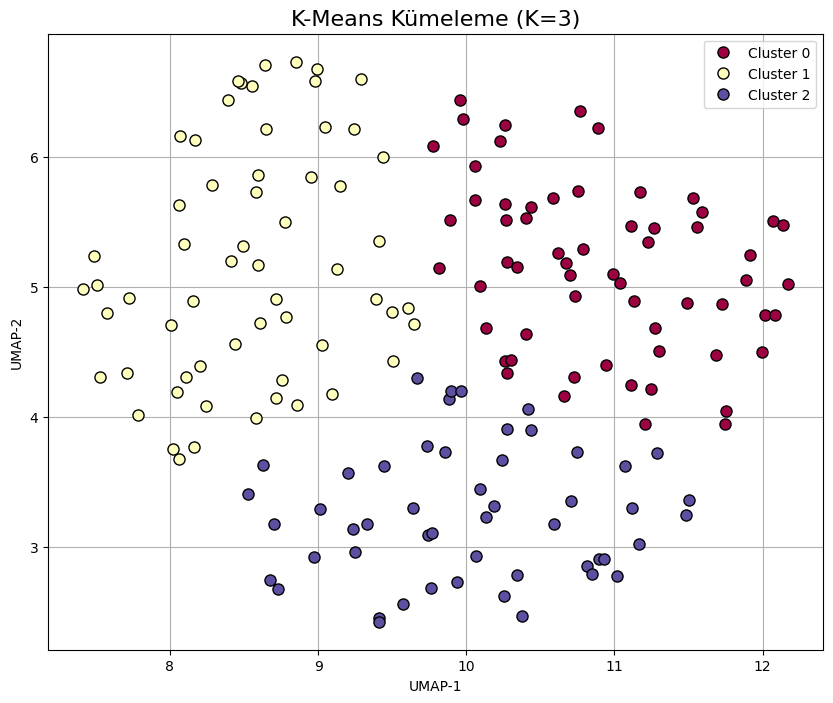


Cluster Distribution:
cluster
0    61
1    60
2    51
Name: count, dtype: int64

📌 Küme Temaları (Anahtar Kelimeler):
Küme 0: ['iş', 'stanbul', 'türkiye', 'ayrıca', 'olarak']
Küme 1: ['şirket', 'şirketin', 'olarak', 'türkiye', 'kurdu']
Küme 2: ['ayrıca', 'belirtiyor', 'türkiye', 'şirket', 'nin']

📌 Küme Örnekleri:

--- Küme 0 Örnekleri (61 öğe) ---
- Maçkolik'in kurucusu, Uşak doğumlu ve Boğaziçi Üniversitesi Bilgisayar Mühendisliği mezunu bir girişimci. Çocukluğunda köyde ve şehirde büyümüş, babas...
- Ünal Karaca, 1963 yılında Sivas'ta doğdu. 11 çocuklu bir ailenin ortancası olan Karaca, çok küçük yaşlarda zor şartlar altında büyüdü. Babası çiftçi, ...
- Eray Altınbozar, Air Karayip'in kurucusu, girişimciliği borçla başladığını ve aile parasının olmadığını belirtiyor. İlk olarak bir defter şirketi kurd...

--- Küme 1 Örnekleri (60 öğe) ---
- Enes Yılmazer, 1990 doğumlu bir Türk girişimci ve YouTube kişisidir. Surf sporu ile tanıştıktan sonra profesyonel bir sporcu oldu ve dünya şamp

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


📊 K-Means ile kümeleme (K=4)...
Silhouette Skoru: 0.395


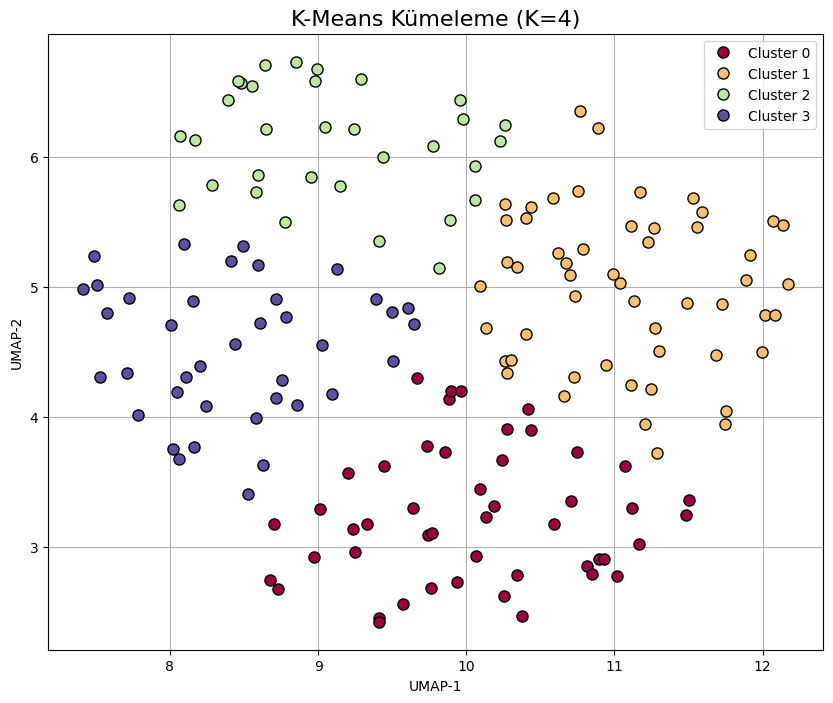


Cluster Distribution:
cluster
1    53
0    48
3    39
2    32
Name: count, dtype: int64

📌 Küme Temaları (Anahtar Kelimeler):
Küme 0: ['ayrıca', 'belirtiyor', 'türkiye', 'şirket', 'kendi']
Küme 1: ['iş', 'olarak', 'söylüyor', 'ayrıca', 'doğdu']
Küme 2: ['şirket', 'şirketin', 'ayrıca', 'türkiye', 'olarak']
Küme 3: ['olarak', 'türkiye', 'çalışmaya', 'kurdu', 'şirket']

📌 Küme Örnekleri:

--- Küme 0 Örnekleri (48 öğe) ---
- Bu metin, bir kişinin hayatındaki dönüm noktalarını ve kariyerini anlatıyor. Kişi, 14 yıllık bir ajans tecrübesinden sonra hayatını değiştirmeye karar...
- Sertaç, Dubai'de çalışırken kurumsal hayatın kendisine keyif vermediğini ve özgür olmak istediğini fark etti. 2012 yılında Singapur'da çalışırken, dün...
- Türkay Gülhan, Aerofix markasının sahibi ve CEO'su olarak, hayat hikayesini ve iş deneyimlerini paylaşıyor. İlkokul yıllarında farklı illerde okuyan G...

--- Küme 1 Örnekleri (53 öğe) ---
- Osman İpek, Rubenis Tekstil Sanayi Ticaret Anonim Şirketi'nin yönetim k

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


📊 K-Means ile kümeleme (K=5)...
Silhouette Skoru: 0.381


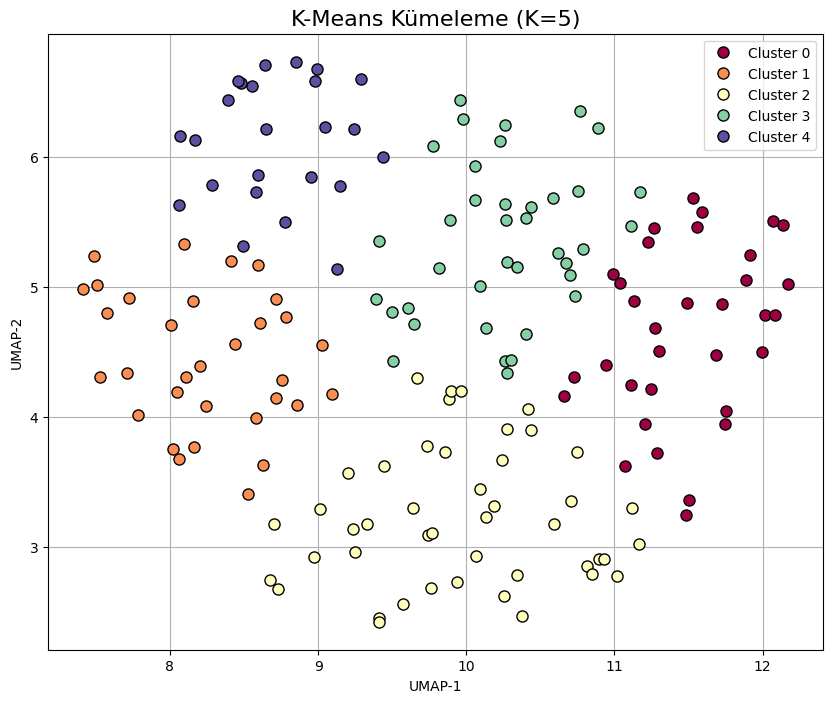


Cluster Distribution:
cluster
2    45
3    38
0    33
1    32
4    24
Name: count, dtype: int64

📌 Küme Temaları (Anahtar Kelimeler):
Küme 0: ['belirtiyor', 'söylüyor', 'ayrıca', 'konuşmacı', 'şirket']
Küme 1: ['olarak', 'türkiye', 'şirket', 'çalışmaya', 'kurdu']
Küme 2: ['ayrıca', 'türkiye', 'belirtiyor', 'şirket', 'nin']
Küme 3: ['stanbul', 'doğdu', 'türkiye', 'çalışmaya', 'iş']
Küme 4: ['şirketin', 'şirket', 'olarak', 'ilk', 'ayrıca']

📌 Küme Örnekleri:

--- Küme 0 Örnekleri (33 öğe) ---
- Ben babamdan hep örnek alırdım, çocukken babamla beraber yaz tatillerinde inşaata girerdim. Orada kafamda şekillenmeye başlıyor, insan kendine bir rol...
- Sultan Tepe, Tepar Tekstil'in yönetim kurulu başkanı, 1966 yılında Niğde'de doğdu. Çocukluğu köyde geçti ve ilkokulu köyde, ortaokulu ise akrabalarını...
- İşte bu metni 2 paragrafa indirgeyebiliriz:

Konuşmacı, ticaret ve markalaşma hakkında konuşuyor. İnsanların bir sene içinde ticaret yapabileceğini, a...

--- Küme 1 Örnekleri (32 öğe) ---


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


📊 HDBSCAN ile kümeleme...
Silhouette Skoru: -0.039


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


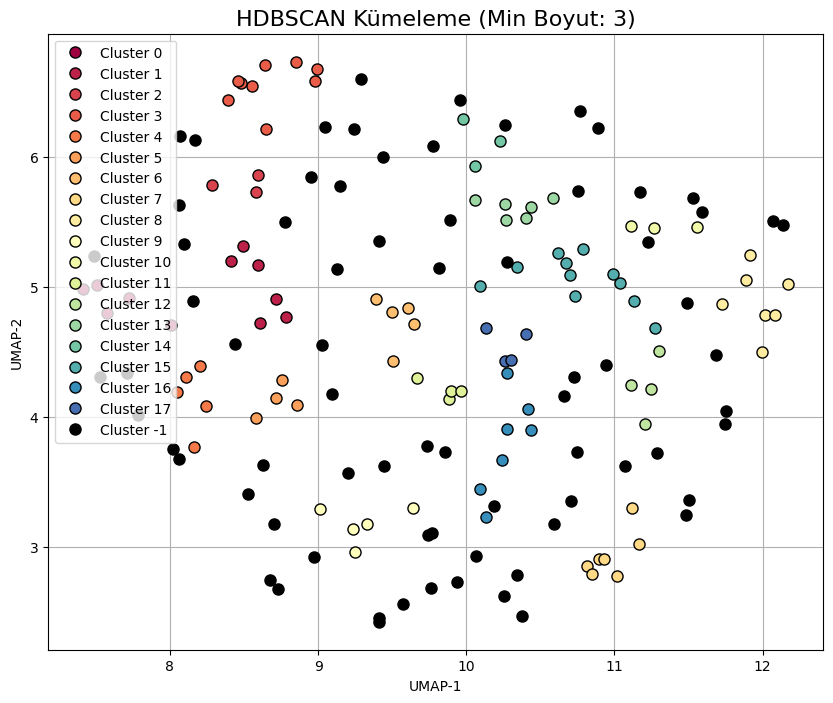


Cluster Distribution:
cluster
-1     74
 15    11
 3      9
 16     7
 7      7
 8      7
 1      6
 13     6
 4      5
 6      5
 9      5
 0      5
 12     4
 11     4
 17     4
 5      4
 10     3
 2      3
 14     3
Name: count, dtype: int64

📌 Küme Temaları (Anahtar Kelimeler):
Küme 0: ['erol', 'şirket', 'nin', 'makine', 'recep']
Küme 1: ['albayrak', 'olarak', 'türkiye', 'iş', 'yaman']
Küme 2: ['şirket', 'türkiye', 'jeneratör', 'doğru', 'koçak']
Küme 3: ['şirketin', 'şirket', 'ayrıca', 'olmak', 'türkiye']
Küme 4: ['sandal', 'çalışmaya', 'karakuş', 'kurdu', 'gençlere']
Küme 5: ['türkiye', 'çalışmaya', 'başarılı', 'stanbul', 'olarak']
Küme 6: ['çalışmaya', 'kurdu', 'ender doğan', 'ender', 'doğan']
Küme 7: ['ayrıca', 'göztepe', 'nin', 'iyi', 'belirtiyor']
Küme 8: ['şirket', 'elektrikli', 'günsel', 'yol', 'rfan']
Küme 9: ['viski', 'önemli', 'gülhan', 'roket', 'uzay']
Küme 10: ['türkiye', 'pek', 'bal', 'mustafa', 'mustafa aydoğdu']
Küme 11: ['öztürk', 'boya', 'şirket', 'mücahit', 'olm

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


📊 HDBSCAN ile kümeleme...
Silhouette Skoru: 0.192


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


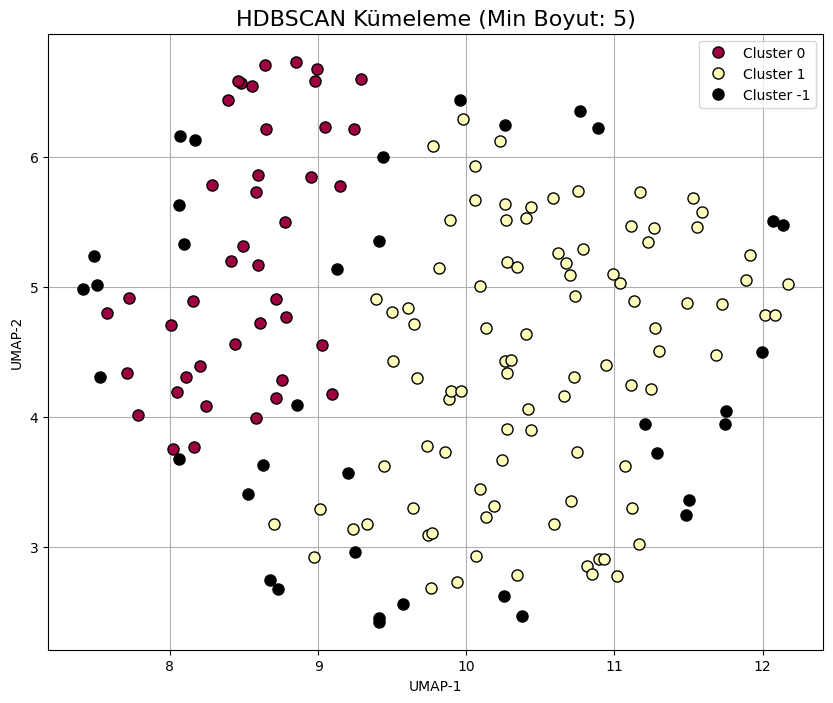


Cluster Distribution:
cluster
 1    93
 0    42
-1    37
Name: count, dtype: int64

📌 Küme Temaları (Anahtar Kelimeler):
Küme 0: ['şirket', 'şirketin', 'olarak', 'türkiye', 'ayrıca']
Küme 1: ['türkiye', 'ayrıca', 'belirtiyor', 'olarak', 'şirket']

📌 Küme Örnekleri:

--- Küme 0 Örnekleri (42 öğe) ---
- Jolly Tur'un kurucusu Sinan Vardar'ın oğlu, şirketin yönetim kurulu başkanı olan Mete Vardar, şirketin tarihçesi ve pandemi sürecindeki deneyimlerini ...
- Yusuf Koçak, Koçak Şirketler Grubu kurucu ortağı, 1966 yılında Trabzon'da doğdu. İstanbul Fatih Aksaray semtinde büyüdü ve Pertevniyal Lisesi'ni bitir...
- Hasan Kaytan, 1982 yılında Şanlıurfa'da 11 çocuklu bir ailenin 5'inci çocuğu olarak dünyaya geldi. İlk ve orta öğrenimini Şanlıurfa'da tamamladı, lise...

--- Küme 1 Örnekleri (93 öğe) ---
- Can Gür, elektronik yüksek mühendisi ve Kenit Grup şirketlerinin yönetim kurulu başkanı, 1952 yılında Kastamonu'da doğdu. İlkokulu köyde, ortaokulu Ka...
- Konuşmacı, Bursa'da doğduğunu ve aile

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


📊 HDBSCAN ile kümeleme...
Silhouette Skoru: 0.004


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


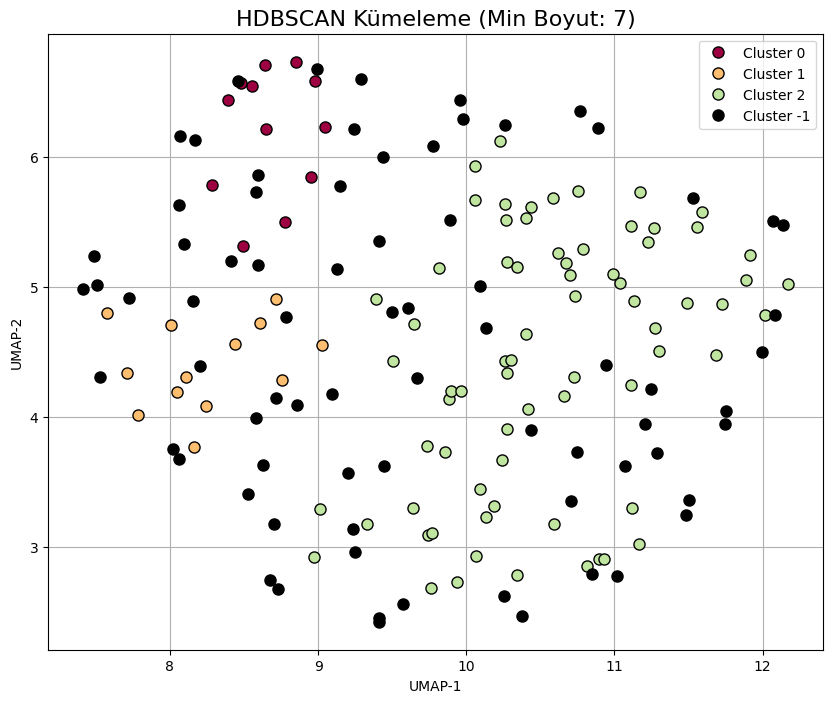


Cluster Distribution:
cluster
-1    75
 2    72
 1    13
 0    12
Name: count, dtype: int64

📌 Küme Temaları (Anahtar Kelimeler):
Küme 0: ['şirketin', 'şirket', 'ayrıca', 'olarak', 'türkiye']
Küme 1: ['olarak', 'şirket', 'türkiye', 'şletme', 'kurdu']
Küme 2: ['türkiye', 'ayrıca', 'belirtiyor', 'iş', 'önemli']

📌 Küme Örnekleri:

--- Küme 0 Örnekleri (12 öğe) ---
- Şahin Tanker'in kurucusu, şirketin zorlu bir geçmişten geldiğini ve hiçbir şeyin kolay olmadığını belirtiyor. Çırak olarak başladıkları dönemde, çok a...
- Fersan, 1978 yılında Kemalpaşa'da kurulmuş bir şirket olup, ilk olarak yaprak salamura ve zeytin üretimiyle başlamıştır. Daha sonra sirke ve turşu üre...
- Can Algül, Pubinno'nun kurucusu ve CEO'su, şirketin hikayesini ve vizyonunu paylaşıyor. Pubinno, "Biranın İnterneti" olarak adlandırılan bir sistem ta...

--- Küme 1 Örnekleri (13 öğe) ---
- Sen, İstanbul doğumlu ve geleneksel bir ailede büyümüşsün. Ailenin gelir durumu yüksek değildi, ancak senin hayal gücün ve öğrenm

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


📊 SOM ile kümeleme (4 beklenen küme)...
Silhouette score cannot be calculated with less than 2 clusters.
Silhouette Skoru: -1.000


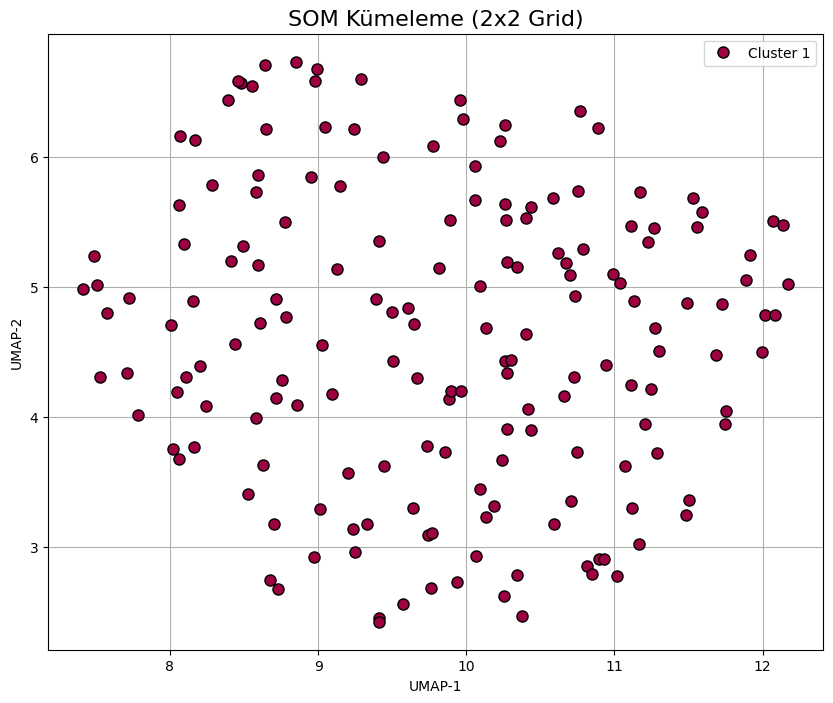


Cluster Distribution:
cluster
1    172
Name: count, dtype: int64

📌 Küme Temaları (Anahtar Kelimeler):
Küme 1: ['şirket', 'türkiye', 'ayrıca', 'olarak', 'şirketin']

📌 Küme Örnekleri:

--- Küme 1 Örnekleri (172 öğe) ---
- Doğan Akyıldız, Rize doğumlu ve İstanbul'da büyümüş bir girişimcidir. 17 yaşında işe başlayan Akyıldız, 22 yıl aynı eğitim kurumunda çalışmış ve sonun...
- Röportajda, 1954 İstanbul doğumlu bir girişimcinin hayat hikayesi ve iş deneyimleri paylaşılmaktadır. Girişimci, memur bir ailenin çocuğu olarak büyüm...
- İşadamı, hayat experiencesını ve iş hayatındaki felsefesini paylaşıyor. Ona göre, iş hayatının temelinde itibar yatıyor ve markalaşmak, iyi bir isim v...

🤖 LLM ile Küme Etiketi Önerileri:
Küme 1 → Nuri Coşkun rfan, Evinox'in kurucusu ve yönetim kurulu başkan

Results for SOM with approx 4 clusters saved to som_4_labeled_llm.xlsx

--- SOM ile 6 Küme (yaklaşık) ---


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


📊 SOM ile kümeleme (6 beklenen küme)...
Silhouette score cannot be calculated with less than 2 clusters.
Silhouette Skoru: -1.000


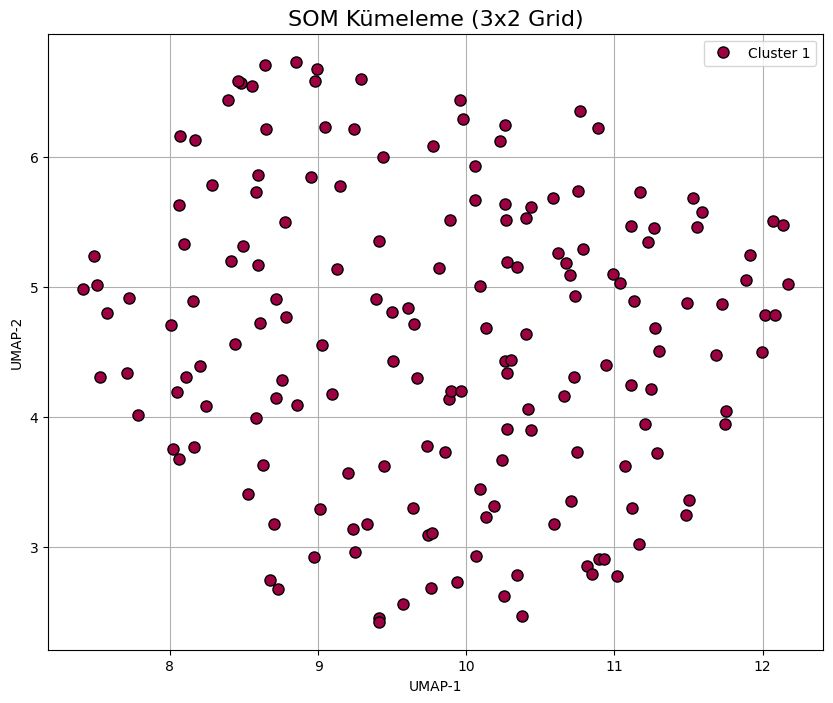


Cluster Distribution:
cluster
1    172
Name: count, dtype: int64

📌 Küme Temaları (Anahtar Kelimeler):
Küme 1: ['şirket', 'türkiye', 'ayrıca', 'olarak', 'şirketin']

📌 Küme Örnekleri:

--- Küme 1 Örnekleri (172 öğe) ---
- Doğan Akyıldız, Rize doğumlu ve İstanbul'da büyümüş bir girişimcidir. 17 yaşında işe başlayan Akyıldız, 22 yıl aynı eğitim kurumunda çalışmış ve sonun...
- Röportajda, 1954 İstanbul doğumlu bir girişimcinin hayat hikayesi ve iş deneyimleri paylaşılmaktadır. Girişimci, memur bir ailenin çocuğu olarak büyüm...
- İşadamı, hayat experiencesını ve iş hayatındaki felsefesini paylaşıyor. Ona göre, iş hayatının temelinde itibar yatıyor ve markalaşmak, iyi bir isim v...

🤖 LLM ile Küme Etiketi Önerileri:
Küme 1 → Nuri Coşkun rfan, Evinox'in kurucusu ve yönetim kurulu başkan

Results for SOM with approx 6 clusters saved to som_6_labeled_llm.xlsx

--- SOM ile 9 Küme (yaklaşık) ---


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


📊 SOM ile kümeleme (9 beklenen küme)...
Silhouette score cannot be calculated with less than 2 clusters.
Silhouette Skoru: -1.000


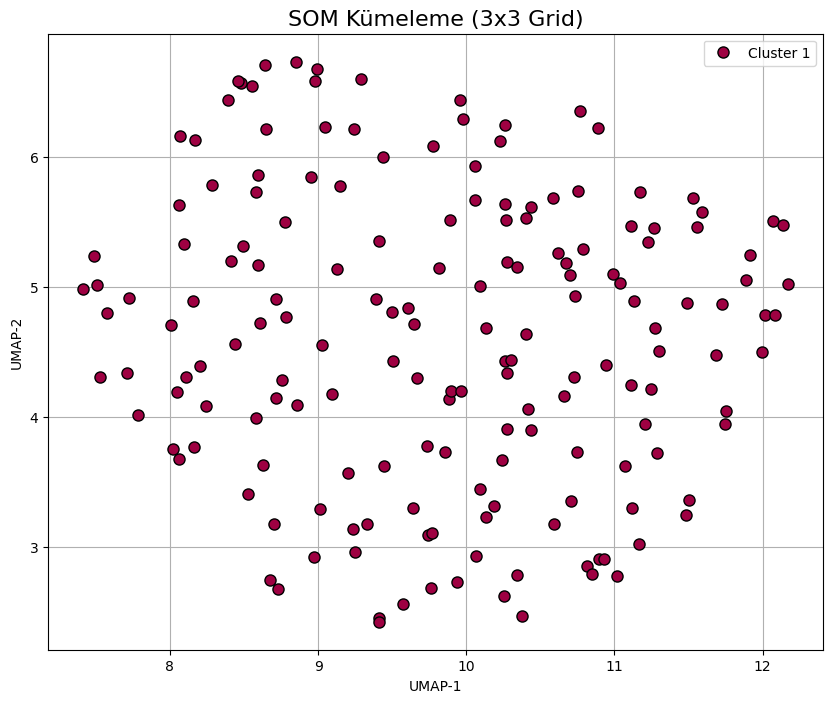


Cluster Distribution:
cluster
1    172
Name: count, dtype: int64

📌 Küme Temaları (Anahtar Kelimeler):
Küme 1: ['şirket', 'türkiye', 'ayrıca', 'olarak', 'şirketin']

📌 Küme Örnekleri:

--- Küme 1 Örnekleri (172 öğe) ---
- Doğan Akyıldız, Rize doğumlu ve İstanbul'da büyümüş bir girişimcidir. 17 yaşında işe başlayan Akyıldız, 22 yıl aynı eğitim kurumunda çalışmış ve sonun...
- Röportajda, 1954 İstanbul doğumlu bir girişimcinin hayat hikayesi ve iş deneyimleri paylaşılmaktadır. Girişimci, memur bir ailenin çocuğu olarak büyüm...
- İşadamı, hayat experiencesını ve iş hayatındaki felsefesini paylaşıyor. Ona göre, iş hayatının temelinde itibar yatıyor ve markalaşmak, iyi bir isim v...

🤖 LLM ile Küme Etiketi Önerileri:
Küme 1 → Nuri Coşkun rfan, Evinox'in kurucusu ve yönetim kurulu başkan

Results for SOM with approx 9 clusters saved to som_9_labeled_llm.xlsx


In [3]:
# All imports are now grouped after the installation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import hdbscan
import umap
from sentence_transformers import SentenceTransformer
from collections import Counter
from transformers import pipeline, logging

# Suppress verbose logging from transformers
logging.set_verbosity_error()

class VideoThemeCluster:
    def __init__(self):
        self.model = SentenceTransformer('all-MiniLM-L6-v2')
        self.text2text_model = pipeline("text2text-generation", model="google/flan-t5-base")
        # Turkish stop words - a basic list, can be expanded
        self.turkish_stop_words = [
            "bir", "ve", "ile", "de", "da", "gibi", "göre", "ise", "mi", "mı", "mu", "mü",
            "nasıl", "ne", "nerede", "neden", "niçin", "neye", "kimi", "kim", "hangi",
            "eğer", "çok", "az", "hiç", "birçok", "birtakım", "her", "hepsi", "bazı",
            "bütün", "tüm", "şunu", "bunu", "onu", "bunlar", "şunlar", "onlar", "ben",
            "sen", "o", "biz", "siz", "onlar", "benim", "senin", "onun", "bizim", "sizin",
            "onların", "bu", "şu", "o", "daha", "en", "sadece", "ancak", "zaten", "fakat",
            "ama", "lakin", "çünkü", "hatta", "böylece", "böyle", "şöyle", "öyle", "artık",
            "hem", "ya", "yok", "var", "için", "den", "dan", "ten", "tan", "e", "a", "ye", "ya",
            "ki", "iken", "dı", "di", "du", "dü", "tı", "ti", "tu", "tü", "dır", "dir", "dur", "dür",
            "dırlar", "dirler", "durlar", "dürler", "olduğunu", "olması", "göre", "sonra", "başladı",
            "yılında" # Added common words from previous keyword analysis
        ]

    def load_data(self, file_path="Helsinki_Opus_Transcript.xlsx"):
        df = pd.read_excel(file_path)
        return df[["Video URL", "Transcript", "Summary"]]

    def embed_text(self, texts):
        return self.model.encode(texts, show_progress_bar=True)

    def reduce_umap(self, embeddings):
        reducer = umap.UMAP(n_components=2, random_state=42)
        return reducer.fit_transform(embeddings)

    def cluster_kmeans(self, embeddings, n_clusters=4):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        return kmeans.fit_predict(embeddings)

    def cluster_som(self, embeddings, map_size=(3, 3)):
        som = MiniSom(map_size[0], map_size[1], embeddings.shape[1],
                      sigma=0.5, learning_rate=0.5, random_seed=42)
        som.train_random(embeddings, 100)
        winners = np.array([som.winner(x) for x in embeddings])
        return winners[:, 0] * map_size[1] + winners[:, 1]

    def cluster_hdbscan(self, embeddings, min_cluster_size=4):
        clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, gen_min_span_tree=True)
        return clusterer.fit_predict(embeddings)

    def evaluate_clusters(self, embeddings, clusters):
        if len(np.unique(clusters)) < 2:
            print("Silhouette score cannot be calculated with less than 2 clusters.")
            return -1
        try:
            return silhouette_score(embeddings, clusters)
        except ValueError as e:
            print(f"Could not calculate silhouette score: {e}")
            return -1

    def plot_clusters(self, embeddings_2d, clusters, title="Clusters"):
        plt.figure(figsize=(10, 8))
        unique_labels = set(clusters)
        colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

        for k, col in zip(unique_labels, colors):
            if k == -1:
                col = [0, 0, 0, 1] # Black for noise
            class_member_mask = (clusters == k)
            xy = embeddings_2d[class_member_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=8, label=f'Cluster {k}')

        plt.title(title, fontsize=16)
        plt.xlabel("UMAP-1")
        plt.ylabel("UMAP-2")
        plt.legend()
        plt.grid(True)
        plt.show()

    def cluster_keywords(self, df, cluster_column="cluster", text_column="Summary", topn=5):
        print("\n📌 Küme Temaları (Anahtar Kelimeler):")
        cluster_terms = {}
        for cluster in sorted([c for c in df[cluster_column].unique() if c != -1]):
            subset = df[df[cluster_column] == cluster][text_column].dropna().astype(str)
            if subset.empty:
                continue
            # Use Turkish stop words
            vectorizer = CountVectorizer(stop_words=self.turkish_stop_words, max_features=50, ngram_range=(1,2))
            X = vectorizer.fit_transform(subset)
            terms = vectorizer.get_feature_names_out()
            word_counts = X.toarray().sum(axis=0)
            top_terms = [terms[i] for i in np.argsort(word_counts)[::-1][:topn]]
            cluster_terms[cluster] = top_terms
            print(f"Küme {cluster}:", top_terms)
        return cluster_terms

    def cluster_samples(self, df, cluster_column="cluster", text_column="Summary", n=3):
        print("\n📌 Küme Örnekleri:")
        for cluster in sorted([c for c in df[cluster_column].unique() if c != -1]):
            cluster_df = df[df[cluster_column] == cluster]
            print(f"\n--- Küme {cluster} Örnekleri ({len(cluster_df)} öğe) ---")
            examples = cluster_df[text_column].dropna().sample(n=min(n, len(cluster_df)), random_state=42)
            for ex in examples:
                print("-", ex[:150] + "...")

    def topic_labeling_llm(self, df, cluster_column="cluster", text_column="Summary"):
        print("\n🤖 LLM ile Küme Etiketi Önerileri:")
        cluster_labels = {}
        for cluster_id in sorted([c for c in df[cluster_column].unique() if c != -1]):
            # Increase sample size and refine prompt
            cluster_texts = df[df[cluster_column] == cluster_id][text_column].dropna().astype(str).sample(n=min(10, len(df[df[cluster_column] == cluster_id])), random_state=42).tolist()
            joined_text = " ".join(cluster_texts)
            # Refined prompt for concise labels, increased max_length
            prompt = f"Given the following texts about business and life stories, provide a very short (2-5 words) and concise common theme or title that best describes them in Turkish. Focus on key actions or themes:\n\n{joined_text}"
            try:
                result = self.text2text_model(prompt, max_length=30, do_sample=False)[0]["generated_text"]
                cluster_labels[cluster_id] = result
                print(f"Küme {cluster_id} → {result}")
            except Exception as e:
                print(f"Error generating LLM label for cluster {cluster_id}: {e}")
                cluster_labels[cluster_id] = "LLM Etiketi Oluşturulamadı"
        return cluster_labels

    def run_analysis(self, use_method='kmeans', n_clusters=4, min_cluster_size_hdbscan=4):
        try:
            df = self.load_data()
        except FileNotFoundError:
            print("Error: Helsinki_Opus_Transcript.xlsx not found. Please upload the file.")
            return None

        texts = df["Summary"].fillna(df["Transcript"])
        embeddings = self.embed_text(texts.tolist())
        reduced_embeddings = self.reduce_umap(embeddings)

        clusters = None
        title = ""
        if use_method == 'umap+hdbscan':
            print("📊 HDBSCAN ile kümeleme...")
            clusters = self.cluster_hdbscan(reduced_embeddings, min_cluster_size=min_cluster_size_hdbscan)
            title = f"HDBSCAN Kümeleme (Min Boyut: {min_cluster_size_hdbscan})"
        elif use_method == 'kmeans':
            print(f"📊 K-Means ile kümeleme (K={n_clusters})...")
            clusters = self.cluster_kmeans(reduced_embeddings, n_clusters=n_clusters)
            title = f"K-Means Kümeleme (K={n_clusters})"
        elif use_method == 'som':
            print(f"📊 SOM ile kümeleme ({n_clusters} beklenen küme)...")
            map_x = int(np.ceil(np.sqrt(n_clusters)))
            map_y = int(np.round(n_clusters / map_x)) # Ensure total cells approx n_clusters
            map_size = (map_x, map_y)
            clusters = self.cluster_som(reduced_embeddings, map_size=map_size)
            title = f"SOM Kümeleme ({map_x}x{map_y} Grid)"
        else:
            raise ValueError(f"Geçersiz yöntem: {use_method}")

        score = self.evaluate_clusters(reduced_embeddings, clusters)
        print(f"Silhouette Skoru: {score:.3f}")

        self.plot_clusters(reduced_embeddings, clusters, title=title)

        df["cluster"] = clusters
        print("\nCluster Distribution:")
        print(df["cluster"].value_counts())

        self.cluster_keywords(df)
        self.cluster_samples(df)

        cluster_labels = self.topic_labeling_llm(df)
        cluster_labels[-1] = "Gürültü/Aykırı Değerler" # Turkish for Noise/Outlier
        df["cluster_label"] = df["cluster"].map(cluster_labels)

        return df

# === ANALİZİ BAŞLAT ===
if __name__ == "__main__":
    analyzer = VideoThemeCluster()

    # --- K-MEANS ANALİZİ (Geliştirilmiş) ---
    print("\n" + "="*5 + " 🔍 K-MEANS ANALİZİ (Geliştirilmiş) " + "="*5)
    # Experiment with different n_clusters
    for n_clusters_kmeans in [3, 4, 5]:
        print(f"\n--- K-Means ile {n_clusters_kmeans} Küme ---")
        df_kmeans = analyzer.run_analysis(use_method='kmeans', n_clusters=n_clusters_kmeans)
        if df_kmeans is not None:
            df_kmeans.to_excel(f"kmeans_{n_clusters_kmeans}_labeled_llm.xlsx", index=False)
            print(f"\nResults for K-Means with {n_clusters_kmeans} clusters saved to kmeans_{n_clusters_kmeans}_labeled_llm.xlsx")

    # --- HDBSCAN ANALİZİ ---
    print("\n" + "="*5 + " 🔍 HDBSCAN ANALİZİ " + "="*5)
    # Experiment with different min_cluster_size
    for min_size_hdbscan in [3, 5, 7]:
        print(f"\n--- HDBSCAN ile min_cluster_size={min_size_hdbscan} ---")
        df_hdbscan = analyzer.run_analysis(use_method='umap+hdbscan', min_cluster_size_hdbscan=min_size_hdbscan)
        if df_hdbscan is not None:
            df_hdbscan.to_excel(f"hdbscan_min{min_size_hdbscan}_labeled_llm.xlsx", index=False)
            print(f"\nResults for HDBSCAN with min_cluster_size={min_size_hdbscan} saved to hdbscan_min{min_size_hdbscan}_labeled_llm.xlsx")

    # --- SOM ANALİZİ ---
    print("\n" + "="*5 + " 🔍 SOM ANALİZİ " + "="*5)
    # Experiment with different n_clusters (which determines grid size)
    for n_clusters_som in [4, 6, 9]:
        print(f"\n--- SOM ile {n_clusters_som} Küme (yaklaşık) ---")
        df_som = analyzer.run_analysis(use_method='som', n_clusters=n_clusters_som)
        if df_som is not None:
            df_som.to_excel(f"som_{n_clusters_som}_labeled_llm.xlsx", index=False)
            print(f"\nResults for SOM with approx {n_clusters_som} clusters saved to som_{n_clusters_som}_labeled_llm.xlsx")

=== 🔍 K-MEANS ANALYSIS ===
Generating embeddings...


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


📊 Clustering with K-Means...
Silhouette Score: 0.355


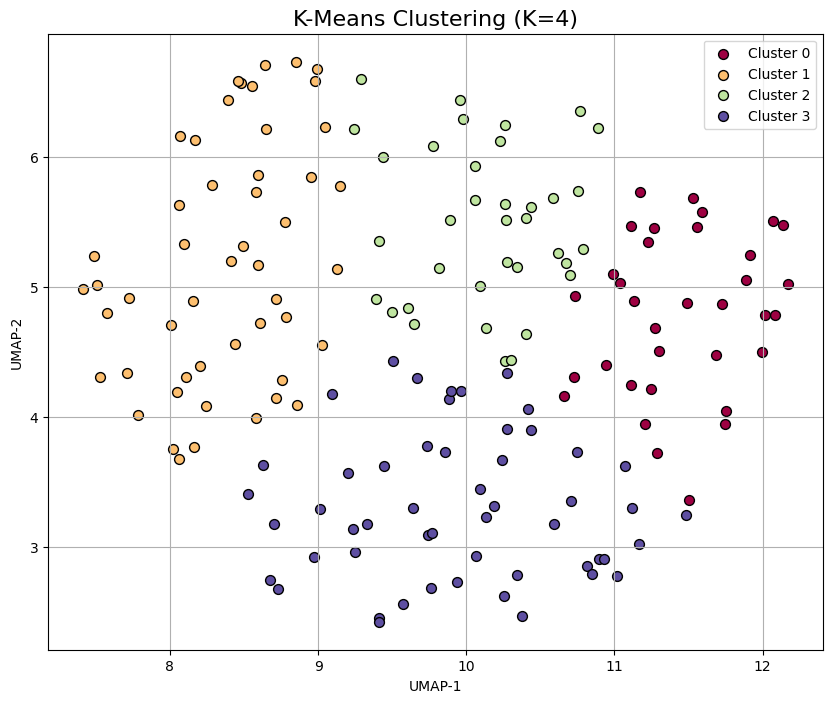


Cluster Distribution:
3    52
1    50
2    36
0    34
Name: count, dtype: int64

📌 Cluster Themes (Keywords):
Cluster 0: ['ve', 'bir', 'yılında', 'sonra', 'da']
Cluster 1: ['ve', 'bir', 'yılında', 'şirket', 'şirketin']
Cluster 2: ['ve', 'bir', 'yılında', 'sonra', 'başladı']
Cluster 3: ['ve', 'bir', 'bu', 'olduğunu', 'ayrıca']

📌 Cluster Samples:

--- Cluster 0 Samples (34 items) ---
- Sultan Tepe, Tepar Tekstil'in yönetim kurulu başkanı, 1966 yılında Niğde'de doğdu. Çocukluğu köyde geçti ve ilkokulu köyde, ortaokulu ise akrabalarını...
- Can Gür, elektronik yüksek mühendisi ve Kenit Grup şirketlerinin yönetim kurulu başkanı, 1952 yılında Kastamonu'da doğdu. İlkokulu köyde, ortaokulu Ka...
- Fatih, Adıyaman'ın Gerger ilçesinde doğdu ve köyünde ilkokul eğitimini tamamladı. 1979 yılında İstanbul'a geldi ve sıvacılık yapmaya başladı. O zamanl...

--- Cluster 1 Samples (50 items) ---
- Mehmet Erdem Kutsal, 1988'de İstanbul'da doğdu ve Bilkent Üniversitesi bilgisayar mühendisliği'nden mezun

In [4]:
# Install dependencies only if not already installed
import sys
import subprocess

def install_packages():
    """Install required packages if not already installed."""
    required = [
        "minisom", "hdbscan", "umap-learn", "sentence-transformers",
        "transformers", "torch", "openpyxl"
    ]
    for pkg in required:
        try:
            __import__(pkg)
        except ImportError:
            subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

install_packages()

# Grouped imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import hdbscan
import umap
from sentence_transformers import SentenceTransformer
from transformers import pipeline, logging
from typing import List, Dict, Tuple, Optional
from pathlib import Path

# Suppress verbose logging from transformers
logging.set_verbosity_error()

class VideoThemeCluster:
    """A class to perform clustering and theme analysis on video transcripts."""

    def __init__(self, sentence_model: str = 'all-MiniLM-L6-v2', text2text_model: str = 'google/flan-t5-base'):
        """
        Initialize the clustering model with specified transformer models.

        Args:
            sentence_model (str): Name of the sentence transformer model.
            text2text_model (str): Name of the text-to-text generation model.
        """
        try:
            self.model = SentenceTransformer(sentence_model)
            self.text2text_model = pipeline("text2text-generation", model=text2text_model)
        except Exception as e:
            raise RuntimeError(f"Failed to initialize models: {e}")

    def load_data(self, file_path: str = "Helsinki_Opus_Transcript.xlsx") -> pd.DataFrame:
        """
        Load transcript data from an Excel file.

        Args:
            file_path (str): Path to the Excel file.

        Returns:
            pd.DataFrame: DataFrame with 'Video URL', 'Transcript', and 'Summary' columns.

        Raises:
            FileNotFoundError: If the file does not exist.
        """
        if not Path(file_path).exists():
            raise FileNotFoundError(f"File {file_path} not found.")
        try:
            df = pd.read_excel(file_path)
            required_columns = ["Video URL", "Transcript", "Summary"]
            if not all(col in df.columns for col in required_columns):
                raise ValueError(f"File must contain columns: {required_columns}")
            return df[required_columns]
        except Exception as e:
            raise RuntimeError(f"Failed to load data: {e}")

    def embed_text(self, texts: List[str]) -> np.ndarray:
        """
        Generate embeddings for a list of texts.

        Args:
            texts (List[str]): List of text strings to embed.

        Returns:
            np.ndarray: Array of text embeddings.
        """
        return self.model.encode(texts, show_progress_bar=True, batch_size=32)

    def reduce_umap(self, embeddings: np.ndarray, n_components: int = 2) -> np.ndarray:
        """
        Reduce dimensionality of embeddings using UMAP.

        Args:
            embeddings (np.ndarray): Input embeddings.
            n_components (int): Number of dimensions to reduce to.

        Returns:
            np.ndarray: Reduced embeddings.
        """
        reducer = umap.UMAP(n_components=n_components, random_state=42, n_jobs=1)
        return reducer.fit_transform(embeddings)

    def cluster_kmeans(self, embeddings: np.ndarray, n_clusters: int = 4) -> np.ndarray:
        """
        Perform K-Means clustering on embeddings.

        Args:
            embeddings (np.ndarray): Input embeddings.
            n_clusters (int): Number of clusters.

        Returns:
            np.ndarray: Cluster labels.
        """
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
        return kmeans.fit_predict(embeddings)

    def cluster_som(self, embeddings: np.ndarray, map_size: Tuple[int, int] = (3, 3)) -> np.ndarray:
        """
        Perform SOM clustering on embeddings.

        Args:
            embeddings (np.ndarray): Input embeddings.
            map_size (Tuple[int, int]): Size of the SOM grid.

        Returns:
            np.ndarray: Cluster labels.
        """
        som = MiniSom(map_size[0], map_size[1], embeddings.shape[1], sigma=0.5, learning_rate=0.5, random_seed=42)
        som.train_random(embeddings, 100)
        winners = np.array([som.winner(x) for x in embeddings])
        return winners[:, 0] * map_size[1] + winners[:, 1]

    def cluster_hdbscan(self, embeddings: np.ndarray, min_cluster_size: int = 4) -> np.ndarray:
        """
        Perform HDBSCAN clustering on embeddings.

        Args:
            embeddings (np.ndarray): Input embeddings.
            min_cluster_size (int): Minimum cluster size.

        Returns:
            np.ndarray: Cluster labels, with -1 indicating noise.
        """
        clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, gen_min_span_tree=True)
        return clusterer.fit_predict(embeddings)

    def evaluate_clusters(self, embeddings: np.ndarray, clusters: np.ndarray) -> float:
        """
        Evaluate clustering quality using silhouette score.

        Args:
            embeddings (np.ndarray): Input embeddings.
            clusters (np.ndarray): Cluster labels.

        Returns:
            float: Silhouette score, or -1 if score cannot be computed.
        """
        unique_clusters = np.unique(clusters)
        if len(unique_clusters) < 2 or -1 in unique_clusters and len(unique_clusters) == 2:
            print("Silhouette score requires at least 2 valid clusters.")
            return -1
        try:
            return silhouette_score(embeddings, clusters)
        except ValueError as e:
            print(f"Silhouette score calculation failed: {e}")
            return -1

    def plot_clusters(self, embeddings_2d: np.ndarray, clusters: np.ndarray, title: str = "Clusters") -> None:
        """
        Plot 2D embeddings with cluster labels.

        Args:
            embeddings_2d (np.ndarray): 2D embeddings for plotting.
            clusters (np.ndarray): Cluster labels.
            title (str): Plot title.
        """
        plt.figure(figsize=(10, 8))
        unique_labels = np.unique(clusters)
        colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

        for k, col in zip(unique_labels, colors):
            if k == -1:  # Noise points
                col = [0, 0, 0, 1]
            mask = clusters == k
            plt.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1],
                       c=[col], label=f'Cluster {k}', s=50, edgecolor='k')

        plt.title(title, fontsize=16)
        plt.xlabel("UMAP-1")
        plt.ylabel("UMAP-2")
        plt.legend()
        plt.grid(True)
        plt.show()

    def cluster_keywords(self, df: pd.DataFrame, cluster_column: str = "cluster",
                        text_column: str = "Summary", top_n: int = 5) -> Dict[int, List[str]]:
        """
        Extract top keywords for each cluster.

        Args:
            df (pd.DataFrame): DataFrame with cluster and text columns.
            cluster_column (str): Name of the cluster column.
            text_column (str): Name of the text column.
            top_n (int): Number of top keywords to extract.

        Returns:
            Dict[int, List[str]]: Dictionary mapping clusters to top keywords.
        """
        print("\n📌 Cluster Themes (Keywords):")
        cluster_terms = {}
        for cluster in sorted([c for c in df[cluster_column].unique() if c != -1]):
            subset = df[df[cluster_column] == cluster][text_column].dropna().astype(str)
            if subset.empty:
                continue
            vectorizer = CountVectorizer(stop_words='english', max_features=50, ngram_range=(1, 2))
            X = vectorizer.fit_transform(subset)
            terms = vectorizer.get_feature_names_out()
            word_counts = X.toarray().sum(axis=0)
            top_terms = [terms[i] for i in np.argsort(word_counts)[::-1][:top_n]]
            cluster_terms[cluster] = top_terms
            print(f"Cluster {cluster}: {top_terms}")
        return cluster_terms

    def cluster_samples(self, df: pd.DataFrame, cluster_column: str = "cluster",
                       text_column: str = "Summary", n: int = 3) -> None:
        """
        Display sample texts for each cluster.

        Args:
            df (pd.DataFrame): DataFrame with cluster and text columns.
            cluster_column (str): Name of the cluster column.
            text_column (str): Name of the text column.
            n (int): Number of samples to display per cluster.
        """
        print("\n📌 Cluster Samples:")
        for cluster in sorted([c for c in df[cluster_column].unique() if c != -1]):
            cluster_df = df[df[cluster_column] == cluster]
            print(f"\n--- Cluster {cluster} Samples ({len(cluster_df)} items) ---")
            samples = cluster_df[text_column].dropna().sample(
                n=min(n, len(cluster_df)), random_state=42
            )
            for sample in samples:
                print(f"- {sample[:150]}...")

    def topic_labeling_llm(self, df: pd.DataFrame, cluster_column: str = "cluster",
                          text_column: str = "Summary", max_samples: int = 5) -> Dict[int, str]:
        """
        Generate cluster labels using LLM.

        Args:
            df (pd.DataFrame): DataFrame with cluster and text columns.
            cluster_column (str): Name of the cluster column.
            text_column (str): Name of the text column.
            max_samples (int): Maximum number of texts to use for labeling.

        Returns:
            Dict[int, str]: Dictionary mapping clusters to LLM-generated labels.
        """
        print("\n🤖 LLM Cluster Label Suggestions:")
        cluster_labels = {}
        for cluster_id in sorted([c for c in df[cluster_column].unique() if c != -1]):
            texts = df[df[cluster_column] == cluster_id][text_column].dropna().astype(str)
            samples = texts.sample(n=min(max_samples, len(texts)), random_state=42).tolist()
            if not samples:
                continue
            prompt = f"Summarize the common theme of the following texts in a single phrase:\n\n{' '.join(samples)}"
            try:
                label = self.text2text_model(prompt, max_length=20, do_sample=False)[0]["generated_text"]
                cluster_labels[cluster_id] = label
                print(f"Cluster {cluster_id} → {label}")
            except Exception as e:
                print(f"Failed to generate label for Cluster {cluster_id}: {e}")
                cluster_labels[cluster_id] = "Unknown"
        return cluster_labels

    def run_analysis(self, use_method: str = 'kmeans', n_clusters: int = 4,
                     file_path: str = "Helsinki_Opus_Transcript.xlsx") -> Optional[pd.DataFrame]:
        """
        Run the full clustering and analysis pipeline.

        Args:
            use_method (str): Clustering method ('kmeans', 'som', 'umap+hdbscan').
            n_clusters (int): Number of clusters for K-Means or SOM.
            file_path (str): Path to the input Excel file.

        Returns:
            Optional[pd.DataFrame]: DataFrame with clustering results, or None if analysis fails.
        """
        try:
            # Load data
            df = self.load_data(file_path)
            texts = df["Summary"].fillna(df["Transcript"]).astype(str)

            # Generate embeddings
            print("Generating embeddings...")
            embeddings = self.embed_text(texts.tolist())
            reduced_embeddings = self.reduce_umap(embeddings)

            # Perform clustering
            if use_method == 'umap+hdbscan':
                print("📊 Clustering with HDBSCAN...")
                clusters = self.cluster_hdbscan(reduced_embeddings)
                title = "HDBSCAN Clustering"
            elif use_method == 'kmeans':
                print("📊 Clustering with K-Means...")
                clusters = self.cluster_kmeans(reduced_embeddings, n_clusters)
                title = f"K-Means Clustering (K={n_clusters})"
            elif use_method == 'som':
                print("📊 Clustering with SOM...")
                map_size = (int(np.ceil(np.sqrt(n_clusters))), int(np.round(np.sqrt(n_clusters))))
                clusters = self.cluster_som(reduced_embeddings, map_size)
                title = f"SOM Clustering ({map_size[0]}x{map_size[1]} Grid)"
            else:
                raise ValueError(f"Invalid method: {use_method}")

            # Evaluate and visualize
            score = self.evaluate_clusters(reduced_embeddings, clusters)
            print(f"Silhouette Score: {score:.3f}")
            self.plot_clusters(reduced_embeddings, clusters, title)
            print("\nCluster Distribution:")
            print(pd.Series(clusters).value_counts())

            # Add results to DataFrame
            df["cluster"] = clusters
            self.cluster_keywords(df)
            self.cluster_samples(df)
            cluster_labels = self.topic_labeling_llm(df)
            cluster_labels[-1] = "Noise/Outlier"
            df["cluster_label"] = df["cluster"].map(cluster_labels)

            return df

        except Exception as e:
            print(f"Analysis failed: {e}")
            return None

if __name__ == "__main__":
    analyzer = VideoThemeCluster()
    print("=== 🔍 K-MEANS ANALYSIS ===")
    df_kmeans = analyzer.run_analysis(use_method='kmeans', n_clusters=4)

    if df_kmeans is not None:
        print("\nAnalysis complete. Saving results to kmeans_labeled_llm.xlsx")
        df_kmeans.to_excel("kmeans_labeled_llm.xlsx", index=False)

Installing required packages...
!pip install minisom hdbscan umap-learn sentence-transformers transformers torch openpyxl nltk scikit-learn matplotlib seaborn
Optional: !pip install wordcloud for word cloud visualizations

=== 🔍 K-MEANS ANALİZ ===
=== 🔍 K-MEANS ANALİZ ===


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


📊 K-Means ile kümeleme...
Silhouette Skoru: 0.395

Küme Dağılımı:
cluster
0    48
1    53
2    32
3    39
Name: count, dtype: int64

📌 Küme Temaları (Anahtar Kelimeler):
Küme 0: ['olduğunu', 'şirket', 'belirtiyor', 'türkiye', 'gerektiğini', 'olmak', 'yılında', 'başarılı', 'nin', 'büyük']
Küme 1: ['yılında', 'başladı', 'olduğunu', 'iş', 'söylüyor', 'stanbul', 'ilk', 'gerektiğini', 'belirtiyor', 'türkiye']
Küme 2: ['şirket', 'şirketin', 'yılında', 'başladı', 'türkiye', 'stanbul', 'söylüyor', 'belirtiyor', 'olduğunu', 'yapıyor']
Küme 3: ['yılında', 'başladı', 'şirket', 'türkiye', 'iş', 'kurdu', 'olduğunu', 'şirketin', 'çalışmaya', 'başarılı']

📌 Küme Örnekleri:

--- Küme 0 Küme Örnekleri (48 öğe) ---
- Bu metin, bir kişinin hayatındaki dönüm noktalarını ve kariyerini anlatıyor. Kişi, 14 yıllık bir ajans tecrübesinden sonra hayatını değiştirmeye karar...
- Sertaç, Dubai'de çalışırken kurumsal hayatın kendisine keyif vermediğini ve özgür olmak istediğini fark etti. 2012 yılında Singapur'da 

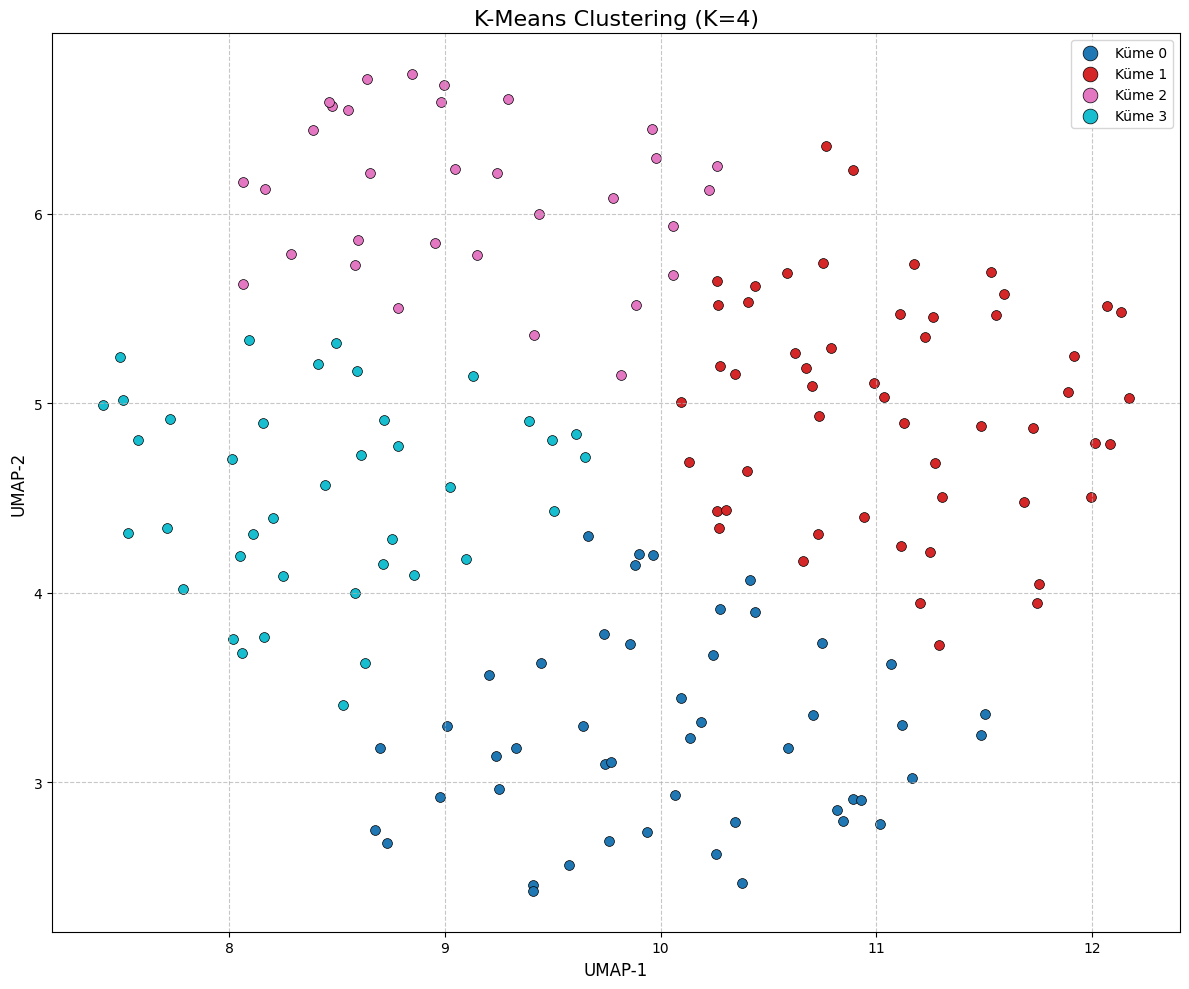

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import hdbscan
import umap
from sentence_transformers import SentenceTransformer
import logging
from transformers import pipeline
import os
import seaborn as sns
import re
import nltk

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Suppress verbose logging from transformers
from transformers import logging as transformers_logging
transformers_logging.set_verbosity_error()

# Define basic stopwords without relying on NLTK
BASIC_STOP_WORDS = {
    'english': {'and', 'the', 'a', 'an', 'in', 'on', 'at', 'to', 'for', 'with', 'by',
                'of', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has',
                'had', 'do', 'does', 'did', 'but', 'or', 'as', 'if', 'while', 'because',
                'than', 'when', 'where', 'how', 'what', 'who', 'this', 'that', 'these',
                'those', 'they', 'them', 'their', 'which', 'each', 'such', 'will', 'would',
                'should', 'could', 'i', 'you', 'he', 'she', 'we', 'it', 'its', 'we', 'us'},
    'turkish': {'ve', 'bir', 'bu', 'ile', 'için', 'da', 'de', 'ben', 'sen', 'o', 'biz',
                'siz', 'onlar', 'ki', 'mi', 'mı', 'mu', 'mü', 'ne', 'nasıl', 'nerede',
                'neden', 'gibi', 'ama', 'fakat', 'lakin', 'ancak', 'ya', 'veya', 'yahut',
                'olarak', 'sonra', 'önce', 'kadar', 'eğer', 'göre', 'daha', 'hiç', 'tüm',
                'her', 'kendi', 'ayrıca'}
}

# Try to extend with NLTK stopwords if available
try:
    nltk.download('stopwords', quiet=True)
    STOP_WORDS = set(nltk.corpus.stopwords.words('english') + nltk.corpus.stopwords.words('turkish'))
    # Add common words that don't add meaning
    STOP_WORDS.update(BASIC_STOP_WORDS['english'])
    STOP_WORDS.update(BASIC_STOP_WORDS['turkish'])
except:
    logger.warning("NLTK stopwords could not be downloaded. Using basic stopwords list.")
    STOP_WORDS = set()
    STOP_WORDS.update(BASIC_STOP_WORDS['english'])
    STOP_WORDS.update(BASIC_STOP_WORDS['turkish'])


class VideoThemeCluster:
    """
    A class for clustering video content based on transcript/summary text,
    identifying themes, and visualizing results.
    """

    def __init__(self, language='en', output_dir='results'):
        """
        Initialize the VideoThemeCluster with models and settings.

        Args:
            language (str): Language code for outputs ('en' or 'tr')
            output_dir (str): Directory to save results
        """
        self.language = language
        self.output_dir = output_dir

        # Create output directory if it doesn't exist
        try:
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)
        except Exception as e:
            logger.warning(f"Could not create output directory: {e}")

        # Load sentence transformer model for embeddings
        logger.info("Loading sentence transformer model...")
        self.model = SentenceTransformer('all-MiniLM-L6-v2')

        # Load text generation model for topic labeling
        logger.info("Loading text generation model...")
        self.text2text_model = pipeline("text2text-generation", model="google/flan-t5-base")

        # Set up text based on language
        self._setup_language_text()

        # Try to import WordCloud
        try:
            from wordcloud import WordCloud
            globals()['WordCloud'] = WordCloud
        except ImportError:
            logger.warning("WordCloud package not found. Word cloud generation will be skipped.")
            print("Note: WordCloud package not available. Install with 'pip install wordcloud' to enable word cloud visualizations.")

    def _setup_language_text(self):
        """Set up text outputs based on selected language."""
        if self.language == 'tr':
            self.texts = {
                'cluster': 'Küme',
                'themes': 'Küme Temaları (Anahtar Kelimeler)',
                'examples': 'Küme Örnekleri',
                'examples_items': 'öğe',
                'llm_labels': 'LLM ile Küme Etiketi Önerileri',
                'kmeans_analysis': 'K-MEANS ANALİZ',
                'hdbscan_analysis': 'HDBSCAN ANALİZ',
                'som_analysis': 'SOM ANALİZ',
                'with_clustering': 'ile kümeleme',
                'silhouette_score': 'Silhouette Skoru',
                'cluster_distribution': 'Küme Dağılımı',
                'noise': 'Gürültü/Aykırı Değer'
            }
        else:
            self.texts = {
                'cluster': 'Cluster',
                'themes': 'Cluster Themes (Keywords)',
                'examples': 'Cluster Examples',
                'examples_items': 'items',
                'llm_labels': 'LLM Cluster Label Suggestions',
                'kmeans_analysis': 'K-MEANS ANALYSIS',
                'hdbscan_analysis': 'HDBSCAN ANALYSIS',
                'som_analysis': 'SOM ANALYSIS',
                'with_clustering': 'clustering',
                'silhouette_score': 'Silhouette Score',
                'cluster_distribution': 'Cluster Distribution',
                'noise': 'Noise/Outlier'
            }

    def load_data(self, file_path):
        """
        Load data from Excel file.

        Args:
            file_path (str): Path to Excel file with video data

        Returns:
            DataFrame: Pandas DataFrame with loaded data
        """
        logger.info(f"Loading data from {file_path}")
        try:
            df = pd.read_excel(file_path)
            # Check if required columns exist
            required_cols = ["Video URL", "Transcript", "Summary"]
            missing_cols = [col for col in required_cols if col not in df.columns]

            if missing_cols:
                logger.warning(f"Missing columns: {missing_cols}")
                # Try to find alternative columns
                if "Transcript" not in df.columns and "transcript" in df.columns:
                    df["Transcript"] = df["transcript"]
                if "Summary" not in df.columns and "summary" in df.columns:
                    df["Summary"] = df["summary"]
                if "Video URL" not in df.columns and "url" in df.columns:
                    df["Video URL"] = df["url"]

            # Select relevant columns with fallback
            usable_cols = [col for col in required_cols if col in df.columns]
            if not usable_cols:
                raise ValueError("No usable columns found in the data")

            return df[usable_cols]
        except Exception as e:
            logger.error(f"Error loading data: {e}")
            raise

    def preprocess_text(self, text):
        """
        Preprocess text by removing special characters and stopwords.

        Args:
            text (str): Text to preprocess

        Returns:
            str: Preprocessed text
        """
        if not isinstance(text, str):
            return ""

        # Convert to lowercase
        text = text.lower()

        # Remove special characters and digits
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\d+', '', text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    def embed_text(self, texts):
        """
        Create embeddings from text using SentenceTransformer.

        Args:
            texts (list): List of texts to embed

        Returns:
            numpy.ndarray: Array of embeddings
        """
        logger.info(f"Embedding {len(texts)} texts...")
        # Filter out None or empty texts
        valid_texts = [t if isinstance(t, str) and t.strip() else "empty content" for t in texts]
        return self.model.encode(valid_texts, show_progress_bar=True)

    def reduce_umap(self, embeddings, n_components=2, n_neighbors=15, min_dist=0.1):
        """
        Reduce dimensionality using UMAP.

        Args:
            embeddings (numpy.ndarray): Embeddings to reduce
            n_components (int): Number of dimensions to reduce to
            n_neighbors (int): Number of neighbors for UMAP
            min_dist (float): Minimum distance parameter for UMAP

        Returns:
            numpy.ndarray: Reduced embeddings
        """
        logger.info(f"Reducing dimensions with UMAP to {n_components} components...")
        reducer = umap.UMAP(
            n_components=n_components,
            n_neighbors=n_neighbors,
            min_dist=min_dist,
            random_state=42
        )
        return reducer.fit_transform(embeddings)

    def cluster_kmeans(self, embeddings, n_clusters=4):
        """
        Cluster embeddings using K-means.

        Args:
            embeddings (numpy.ndarray): Embeddings to cluster
            n_clusters (int): Number of clusters

        Returns:
            numpy.ndarray: Cluster assignments
        """
        logger.info(f"Clustering with K-means (k={n_clusters})...")
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        return kmeans.fit_predict(embeddings)

    def cluster_som(self, embeddings, map_size=(3, 3)):
        """
        Cluster embeddings using Self-Organizing Maps (SOM).

        Args:
            embeddings (numpy.ndarray): Embeddings to cluster
            map_size (tuple): Size of SOM grid (x, y)

        Returns:
            numpy.ndarray: Cluster assignments
        """
        logger.info(f"Clustering with SOM (grid={map_size})...")
        som = MiniSom(
            map_size[0], map_size[1],
            embeddings.shape[1],
            sigma=0.5,
            learning_rate=0.5,
            random_seed=42
        )
        som.train_random(embeddings, 100)
        winners = np.array([som.winner(x) for x in embeddings])

        # Convert 2D winner coordinates to a 1D cluster label
        return winners[:, 0] * map_size[1] + winners[:, 1]

    def cluster_hdbscan(self, embeddings, min_cluster_size=4, min_samples=None):
        """
        Cluster embeddings using HDBSCAN.

        Args:
            embeddings (numpy.ndarray): Embeddings to cluster
            min_cluster_size (int): Minimum cluster size for HDBSCAN
            min_samples (int): Minimum samples parameter for HDBSCAN

        Returns:
            numpy.ndarray: Cluster assignments
        """
        logger.info(f"Clustering with HDBSCAN (min_cluster_size={min_cluster_size})...")
        clusterer = hdbscan.HDBSCAN(
            min_cluster_size=min_cluster_size,
            min_samples=min_samples,
            gen_min_span_tree=True,
            cluster_selection_epsilon=0.1,
            metric='euclidean'
        )
        return clusterer.fit_predict(embeddings)

    def evaluate_clusters(self, embeddings, clusters):
        """
        Evaluate clustering quality using silhouette score.

        Args:
            embeddings (numpy.ndarray): Embeddings used for clustering
            clusters (numpy.ndarray): Cluster assignments

        Returns:
            float: Silhouette score or -1 if score cannot be calculated
        """
        # Get unique clusters excluding noise (-1)
        unique_clusters = np.unique(clusters)
        valid_clusters = [c for c in unique_clusters if c != -1]

        # Check if we have at least 2 valid clusters
        if len(valid_clusters) < 2:
            logger.warning("Silhouette score cannot be calculated with less than 2 clusters.")
            return -1

        # Filter out noise points for silhouette calculation
        if -1 in unique_clusters:
            valid_indices = clusters != -1
            valid_embeddings = embeddings[valid_indices]
            valid_cluster_labels = clusters[valid_indices]

            if len(np.unique(valid_cluster_labels)) < 2:
                logger.warning("After removing noise, less than 2 clusters remain.")
                return -1

            try:
                return silhouette_score(valid_embeddings, valid_cluster_labels)
            except Exception as e:
                logger.error(f"Could not calculate silhouette score: {e}")
                return -1
        else:
            try:
                return silhouette_score(embeddings, clusters)
            except Exception as e:
                logger.error(f"Could not calculate silhouette score: {e}")
                return -1

    def plot_clusters(self, embeddings_2d, clusters, title="Clusters", save_path=None):
        """
        Plot clusters in 2D space.

        Args:
            embeddings_2d (numpy.ndarray): 2D embeddings to plot
            clusters (numpy.ndarray): Cluster assignments
            title (str): Plot title
            save_path (str): Path to save plot (if None, plot is displayed)
        """
        plt.figure(figsize=(12, 10))

        # Get unique cluster labels
        unique_labels = sorted(set(clusters))

        # Create a colormap (spectral colors, with black for noise)
        colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

        # Plot each cluster
        for i, k in enumerate(unique_labels):
            col = colors[i]
            if k == -1:
                # Black used for noise
                col = [0, 0, 0, 1]

            # Get mask for points in this cluster
            class_member_mask = (clusters == k)
            xy = embeddings_2d[class_member_mask]

            # Plot points
            plt.scatter(
                xy[:, 0], xy[:, 1],
                s=50, c=[col],
                edgecolors='k', linewidths=0.5,
                label=f'{self.texts["cluster"]} {k}' if k != -1 else self.texts['noise']
            )

        # Add title and labels
        plt.title(title, fontsize=16)
        plt.xlabel("UMAP-1", fontsize=12)
        plt.ylabel("UMAP-2", fontsize=12)

        # Add legend and grid
        plt.legend(fontsize=10, markerscale=1.5)
        plt.grid(True, linestyle='--', alpha=0.7)

        # Improve aesthetics
        plt.tight_layout()

        # Save or show plot
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            logger.info(f"Plot saved to {save_path}")
        else:
            plt.show()

    def create_wordcloud(self, df, cluster_column="cluster", text_column="Summary", save_dir=None):
        """
        Create word clouds for each cluster.

        Args:
            df (DataFrame): DataFrame with cluster assignments
            cluster_column (str): Column with cluster assignments
            text_column (str): Column with text data
            save_dir (str): Directory to save word clouds
        """
        logger.info("Creating word clouds for each cluster...")

        try:
            # Verify WordCloud is available
            if 'WordCloud' not in globals():
                logger.warning("WordCloud module not available, skipping word cloud generation")
                return

            # Create directory for word clouds if it doesn't exist
            if save_dir and not os.path.exists(save_dir):
                os.makedirs(save_dir)

            # Use fixed colors instead of a color function to avoid float/int conversion issues
            colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

            # Process each cluster (excluding noise)
            for cluster in sorted([c for c in df[cluster_column].unique() if c != -1]):
                # Get texts for this cluster
                texts = df[df[cluster_column] == cluster][text_column].dropna().astype(str)

                if texts.empty:
                    continue

                # Combine texts
                combined_text = ' '.join([self.preprocess_text(text) for text in texts])

                if not combined_text.strip():
                    logger.warning(f"No valid text for cluster {cluster}, skipping word cloud")
                    continue

                try:
                    # Create word cloud with fixed colormap instead of color_func
                    wordcloud = WordCloud(
                        width=800,
                        height=400,
                        background_color='white',
                        max_words=50,
                        stopwords=STOP_WORDS,
                        collocations=True,
                        colormap='viridis',  # Use colormap instead of color_func
                        contour_width=1,
                        contour_color='steelblue'
                    ).generate(combined_text)

                    # Plot word cloud
                    plt.figure(figsize=(10, 6))
                    plt.imshow(wordcloud, interpolation='bilinear')
                    plt.axis('off')
                    plt.title(f"{self.texts['cluster']} {cluster} {self.texts['themes']}", fontsize=16)

                    # Save or show
                    if save_dir:
                        save_path = os.path.join(save_dir, f"wordcloud_cluster_{cluster}.png")
                        plt.savefig(save_path, dpi=300, bbox_inches='tight')
                        plt.close()
                    else:
                        plt.show()
                except Exception as e:
                    logger.error(f"Error creating word cloud for cluster {cluster}: {e}")
        except Exception as e:
            logger.error(f"Error in word cloud generation: {e}")
            print(f"Skipping word cloud generation due to error: {e}")

    def cluster_keywords(self, df, cluster_column="cluster", text_column="Summary", topn=10):
        """
        Extract keywords for each cluster.

        Args:
            df (DataFrame): DataFrame with cluster assignments
            cluster_column (str): Column with cluster assignments
            text_column (str): Column with text data
            topn (int): Number of top keywords to extract

        Returns:
            dict: Dictionary mapping cluster IDs to keywords
        """
        print(f"\n📌 {self.texts['themes']}:")
        cluster_terms = {}

        # Process each cluster (excluding noise)
        for cluster in sorted([c for c in df[cluster_column].unique() if c != -1]):
            # Get texts for this cluster
            subset = df[df[cluster_column] == cluster][text_column].dropna().astype(str)

            if subset.empty:
                continue

            # Preprocess texts
            processed_texts = [self.preprocess_text(text) for text in subset]

            # Use TF-IDF instead of CountVectorizer for better keyword extraction
            vectorizer = TfidfVectorizer(
                stop_words=list(STOP_WORDS),
                max_features=100,
                ngram_range=(1, 2)
            )

            # Fit and transform
            try:
                X = vectorizer.fit_transform(processed_texts)
                terms = vectorizer.get_feature_names_out()

                # Get term scores
                tfidf_scores = X.toarray().sum(axis=0)

                # Get top terms
                top_indices = tfidf_scores.argsort()[::-1][:topn]
                top_terms = [terms[i] for i in top_indices]

                cluster_terms[cluster] = top_terms
                print(f"{self.texts['cluster']} {cluster}:", top_terms)
            except Exception as e:
                logger.error(f"Error extracting keywords for cluster {cluster}: {e}")
                cluster_terms[cluster] = []

        return cluster_terms

    def cluster_samples(self, df, cluster_column="cluster", text_column="Summary", n=3):
        """
        Show sample texts from each cluster.

        Args:
            df (DataFrame): DataFrame with cluster assignments
            cluster_column (str): Column with cluster assignments
            text_column (str): Column with text data
            n (int): Number of samples to show
        """
        print(f"\n📌 {self.texts['examples']}:")

        # Process each cluster (including noise if present)
        for cluster in sorted(df[cluster_column].unique()):
            cluster_df = df[df[cluster_column] == cluster]
            cluster_size = len(cluster_df)

            # Skip if no items
            if cluster_size == 0:
                continue

            # Print cluster info
            if cluster == -1:
                print(f"\n--- {self.texts['noise']} ({cluster_size} {self.texts['examples_items']}) ---")
            else:
                print(f"\n--- {self.texts['cluster']} {cluster} {self.texts['examples']} ({cluster_size} {self.texts['examples_items']}) ---")

            # Get sample texts
            examples = cluster_df[text_column].dropna().sample(
                n=min(n, cluster_size),
                random_state=42
            )

            # Print each example
            for ex in examples:
                if isinstance(ex, str):
                    # Truncate and print
                    truncated = ex[:150] + "..." if len(ex) > 150 else ex
                    print("-", truncated)
                else:
                    print("- [Invalid text]")

    def topic_labeling_llm(self, df, cluster_column="cluster", text_column="Summary", max_sample_length=300):
        """
        Generate topic labels using LLM.

        Args:
            df (DataFrame): DataFrame with cluster assignments
            cluster_column (str): Column with cluster assignments
            text_column (str): Column with text data
            max_sample_length (int): Maximum length for sample texts

        Returns:
            dict: Dictionary mapping cluster IDs to labels
        """
        print(f"\n🤖 {self.texts['llm_labels']}:")
        cluster_labels = {}

        # Process each cluster (excluding noise)
        for cluster_id in sorted([c for c in df[cluster_column].unique() if c != -1]):
            try:
                # Get texts for this cluster
                cluster_texts = df[df[cluster_column] == cluster_id][text_column].dropna().astype(str)

                # Sample up to 5 texts
                sampled_texts = cluster_texts.sample(
                    n=min(5, len(cluster_texts)),
                    random_state=42
                ).tolist()

                # Truncate texts to avoid LLM context limits
                truncated_texts = [text[:max_sample_length] + "..." if len(text) > max_sample_length else text for text in sampled_texts]

                # Create prompt
                if self.language == 'tr':
                    prompt = f"Aşağıdaki metinlerin ortak temasını kısa bir başlık olarak özetle (maksimum 5 kelime):\n\n{' '.join(truncated_texts)}"
                else:
                    prompt = f"Summarize the common theme of these texts in a short, concise title (max 5 words):\n\n{' '.join(truncated_texts)}"

                # Generate label with LLM
                result = self.text2text_model(
                    prompt,
                    max_length=30,
                    do_sample=False,
                    num_beams=4,
                    early_stopping=True
                )[0]["generated_text"]

                # Clean up result
                result = result.strip()
                if len(result) > 50:  # Truncate if too long
                    result = result[:50] + "..."

                cluster_labels[cluster_id] = result
                print(f"{self.texts['cluster']} {cluster_id} → {result}")
            except Exception as e:
                logger.error(f"Error generating label for cluster {cluster_id}: {e}")
                cluster_labels[cluster_id] = f"Cluster {cluster_id}"

        # Add label for noise cluster if it exists
        if -1 in df[cluster_column].unique():
            cluster_labels[-1] = self.texts['noise']

        return cluster_labels

    def visualize_cluster_distribution(self, df, cluster_column="cluster", save_path=None):
        """
        Visualize cluster distribution.

        Args:
            df (DataFrame): DataFrame with cluster assignments
            cluster_column (str): Column with cluster assignments
            save_path (str): Path to save visualization
        """
        # Count items in each cluster
        cluster_counts = df[cluster_column].value_counts().sort_index()

        # Replace -1 with "Noise" in the index if present
        if -1 in cluster_counts.index:
            cluster_counts = cluster_counts.rename(index={-1: self.texts['noise']})

        # Create visualization
        plt.figure(figsize=(10, 6))

        # Fix the deprecated seaborn barplot usage
        bars = plt.bar(range(len(cluster_counts)),
                cluster_counts.values,
                color=sns.color_palette('viridis', len(cluster_counts)))

        # Set x-axis labels
        plt.xticks(range(len(cluster_counts)), cluster_counts.index.astype(str))

        # Add count labels on top of bars
        for i, count in enumerate(cluster_counts.values):
            plt.text(i, count + 0.5, str(count), ha='center', fontsize=10)

        # Add title and labels
        plt.title(f"{self.texts['cluster_distribution']}", fontsize=16)
        plt.xlabel(self.texts['cluster'], fontsize=12)
        plt.ylabel("Count", fontsize=12)

        # Rotate x-axis labels if needed
        plt.xticks(rotation=45 if len(cluster_counts) > 5 else 0)

        # Improve aesthetics
        plt.tight_layout()

        # Save or show
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            logger.info(f"Cluster distribution plot saved to {save_path}")
            plt.close()
        else:
            plt.show()

    def run_analysis(self, file_path, use_method='kmeans', n_clusters=4):
        """
        Run full clustering analysis.

        Args:
            file_path (str): Path to data file
            use_method (str): Clustering method ('kmeans', 'som', or 'umap+hdbscan')
            n_clusters (int): Number of clusters for KMeans and SOM

        Returns:
            DataFrame: DataFrame with cluster assignments and labels
        """
        # Print analysis header
        method_text = {
            'kmeans': self.texts['kmeans_analysis'],
            'som': self.texts['som_analysis'],
            'umap+hdbscan': self.texts['hdbscan_analysis']
        }.get(use_method, use_method.upper())

        print(f"=== 🔍 {method_text} ===")

        # Load data
        try:
            df = self.load_data(file_path)
        except Exception as e:
            logger.error(f"Could not load data: {e}")
            return None

        # Prepare text data, using Summary if available, otherwise Transcript
        if "Summary" in df.columns and "Transcript" in df.columns:
            texts = df["Summary"].fillna(df["Transcript"])
        elif "Summary" in df.columns:
            texts = df["Summary"]
        elif "Transcript" in df.columns:
            texts = df["Transcript"]
        else:
            logger.error("No text column found in data")
            return None

        # Create embeddings
        embeddings = self.embed_text(texts.tolist())

        # Reduce dimensions
        reduced_embeddings = self.reduce_umap(embeddings)

        # Apply clustering based on selected method
        if use_method == 'umap+hdbscan':
            print(f"📊 HDBSCAN {self.texts['with_clustering']}...")
            clusters = self.cluster_hdbscan(reduced_embeddings)
            title = f"HDBSCAN Clustering"
        elif use_method == 'kmeans':
            print(f"📊 K-Means {self.texts['with_clustering']}...")
            clusters = self.cluster_kmeans(reduced_embeddings, n_clusters=n_clusters)
            title = f"K-Means Clustering (K={n_clusters})"
        elif use_method == 'som':
            print(f"📊 SOM {self.texts['with_clustering']}...")
            map_x = int(np.ceil(np.sqrt(n_clusters)))
            map_y = int(np.round(np.sqrt(n_clusters)))
            map_size = (map_x, map_y)
            clusters = self.cluster_som(reduced_embeddings, map_size=map_size)
            title = f"SOM Clustering ({map_x}x{map_y} Grid)"
        else:
            raise ValueError(f"Invalid method: {use_method}")

        # Evaluate clustering
        score = self.evaluate_clusters(reduced_embeddings, clusters)
        print(f"{self.texts['silhouette_score']}: {score:.3f}")

        # Create results directory for this run
        try:
            results_dir = os.path.join(self.output_dir, f"{use_method}_analysis")
            if not os.path.exists(results_dir):
                os.makedirs(results_dir)

            # Plot clusters
            plot_path = os.path.join(results_dir, f"{use_method}_clusters.png")
            self.plot_clusters(reduced_embeddings, clusters, title=title, save_path=plot_path)
        except Exception as e:
            logger.error(f"Error creating results directory or plotting: {e}")
            results_dir = None
            print(f"Could not save results to disk: {e}")

        # Add cluster assignments to dataframe
        df["cluster"] = clusters

        # Print cluster distribution
        print(f"\n{self.texts['cluster_distribution']}:")
        print(df["cluster"].value_counts().sort_index())

        # Try to visualize cluster distribution
        try:
            if results_dir:
                dist_path = os.path.join(results_dir, f"{use_method}_distribution.png")
                self.visualize_cluster_distribution(df, save_path=dist_path)
            else:
                self.visualize_cluster_distribution(df)
        except Exception as e:
            logger.error(f"Error visualizing cluster distribution: {e}")
            print(f"Could not create cluster distribution visualization: {e}")

        # Extract keywords for each cluster
        try:
            cluster_terms = self.cluster_keywords(df)
        except Exception as e:
            logger.error(f"Error extracting keywords: {e}")
            print(f"Error extracting keywords: {e}")
            cluster_terms = {}

        # Try to create word clouds
        try:
            if results_dir:
                self.create_wordcloud(df, save_dir=results_dir)
        except Exception as e:
            logger.error(f"Error creating word clouds: {e}")
            print(f"Could not create word clouds: {e}")

        # Show sample texts from each cluster
        try:
            self.cluster_samples(df)
        except Exception as e:
            logger.error(f"Error showing cluster samples: {e}")
            print(f"Error showing cluster samples: {e}")

        # Generate cluster labels
        try:
            cluster_labels = self.topic_labeling_llm(df)
            # Add noise label if needed
            cluster_labels[-1] = self.texts['noise']
            # Add labels to dataframe
            df["cluster_label"] = df["cluster"].map(cluster_labels)
        except Exception as e:
            logger.error(f"Error generating cluster labels: {e}")
            print(f"Error generating cluster labels: {e}")
            df["cluster_label"] = df["cluster"].astype(str)

        # Save results
        try:
            if results_dir:
                results_path = os.path.join(results_dir, f"{use_method}_labeled_results.xlsx")
                df.to_excel(results_path, index=False)
                logger.info(f"Results saved to {results_path}")
                print(f"\nResults saved to {results_path}")
        except Exception as e:
            logger.error(f"Error saving results: {e}")
            print(f"Could not save results to Excel: {e}")

        return df


# Example usage
if __name__ == "__main__":
    # Installation instructions for dependencies
    print("Installing required packages...")
    print("!pip install minisom hdbscan umap-learn sentence-transformers transformers torch openpyxl nltk scikit-learn matplotlib seaborn")
    print("Optional: !pip install wordcloud for word cloud visualizations\n")

    # Create analyzer with desired language ('en' or 'tr')
    analyzer = VideoThemeCluster(language='tr')

    try:
        # Run K-means analysis
        print("=== 🔍 K-MEANS ANALİZ ===")
        df_kmeans = analyzer.run_analysis(
            file_path="Helsinki_Opus_Transcript.xlsx",
            use_method='kmeans',
            n_clusters=4
        )

        print("\nAnalysis complete! Check the 'results' directory for output files and visualizations.")
    except Exception as e:
        print(f"Error running analysis: {e}")
        print("\nTroubleshooting tips:")
        print("1. Make sure all required packages are installed")
        print("2. Ensure the Excel file exists and has the required columns")
        print("3. Check that you have sufficient disk space and permissions")

    # Commented examples of other clustering methods
    """
    # HDBSCAN clustering
    print("\n=== 🔍 HDBSCAN ANALİZ ===")
    df_hdbscan = analyzer.run_analysis(
        file_path="Helsinki_Opus_Transcript.xlsx",
        use_method='umap+hdbscan'
    )

    # SOM clustering
    print("\n=== 🔍 SOM ANALİZ ===")
    df_som = analyzer.run_analysis(
        file_path="Helsinki_Opus_Transcript.xlsx",
        use_method='som',
        n_clusters=9  # Will create a 3x3 grid
    )
    """

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Silhouette Skoru: 0.395


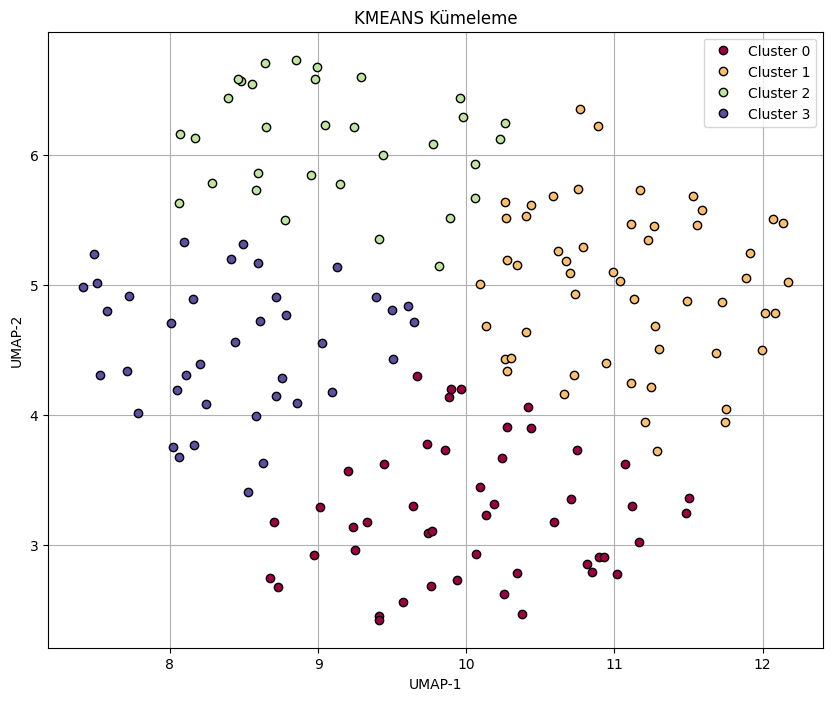


Dağılım:
 cluster
1    53
0    48
3    39
2    32
Name: count, dtype: int64
Küme 0: ['şirket', 'olduğunu', 'türkiye', 'daha', 'belirtiyor']
Küme 1: ['başladı', 'olduğunu', 'daha', 'iş', 'söylüyor']
Küme 2: ['şirketin', 'şirket', 'başladı', 'türkiye', 'stanbul']
Küme 3: ['başladı', 'daha', 'şirket', 'türkiye', 'ancak']

🤖 LLM ile Küme Etiketi Önerileri:
Küme 0 → Ayn zamanda meydana gelen temaslarnn en fazla ilgili bir şekilde açklamasna karşlaştrld: nsanlk ve kariyetlerini söylüyor. Bu yüzde 4 yllar arasnda ayrntlar, bir persona hayata dönüşünün olmak üzere yaplmas yönündeki yolsuzlukla birlikte, ksa süreçte gerçekleştirilmesi ve sektörüne kabul edilmesini başlad.
Küme 1 → Osman Ipek, Rubenis Tekstil Sanayi Ticaret Anonim irketi'nin genel başkan olarak görevdeki bir başlk yaynladn söyledi.
Küme 2 → nsanlarn yan sra, ayn zamandrlmasna karş çkyor: Berat Beran, 1946 ylnda Diyarbakr'da. Ailesi fakir olduunu eitimine zorunda kaldrd. Neftaş Eczaclik Okulu'nun yedi yaşanan bir şekilde olmakla

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import hdbscan
import umap
from sentence_transformers import SentenceTransformer
from transformers import pipeline, logging

# Suppress verbose logging from transformers
logging.set_verbosity_error()

# Expand Turkish stopwords as needed
TURKISH_STOPWORDS = {
    've', 'bir', 'bu', 'da', 'de', 'ile', 'için', 'gibi', 'olarak',
    'sonra', 'önce', 'yılında', 'artık', 'çok', 'tüm', 'her', 'ise'
}

class VideoThemeCluster:
    def __init__(self):
        self.model = SentenceTransformer('all-MiniLM-L6-v2')
        # Use summarization pipeline for concise titles
        self.summarizer = pipeline(
            'summarization',
            model='google/flan-t5-base',
            tokenizer='google/flan-t5-base',
            framework='pt'
        )

    def load_data(self, file_path="Helsinki_Opus_Transcript.xlsx"):
        df = pd.read_excel(file_path)
        return df[["Video URL", "Transcript", "Summary"]]

    def embed_text(self, texts):
        return self.model.encode(texts, show_progress_bar=True)

    def reduce_umap(self, embeddings):
        reducer = umap.UMAP(n_components=2, random_state=42)
        return reducer.fit_transform(embeddings)

    def cluster_kmeans(self, embeddings, n_clusters=4):
        km = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        return km.fit_predict(embeddings)

    def cluster_som(self, embeddings, map_size=(3, 3)):
        som = MiniSom(map_size[0], map_size[1], embeddings.shape[1], sigma=0.5, learning_rate=0.5, random_seed=42)
        som.train_random(embeddings, 100)
        winners = np.array([som.winner(x) for x in embeddings])
        return winners[:, 0] * map_size[1] + winners[:, 1]

    def cluster_hdbscan(self, embeddings, min_cluster_size=4):
        clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
        return clusterer.fit_predict(embeddings)

    def evaluate_clusters(self, embeddings, clusters):
        labels = np.unique(clusters)
        if len(labels) < 2:
            return -1
        return silhouette_score(embeddings, clusters)

    def plot_clusters(self, em2d, clusters, title="Clusters"):
        plt.figure(figsize=(10, 8))
        unique = set(clusters)
        colors = [plt.cm.Spectral(i) for i in np.linspace(0, 1, len(unique))]
        for k, col in zip(unique, colors):
            mask = clusters == k
            pts = em2d[mask]
            plt.plot(pts[:, 0], pts[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6,
                     label='Noise' if k == -1 else f'Cluster {k}')
        plt.title(title)
        plt.xlabel('UMAP-1')
        plt.ylabel('UMAP-2')
        plt.legend()
        plt.grid(True)
        plt.show()

    def cluster_keywords(self, df, cluster_col='cluster', text_col='Summary', topn=5):
        terms = {}
        for c in sorted(set(df[cluster_col]) - {-1}):
            texts = df[df[cluster_col] == c][text_col].dropna().astype(str)
            if texts.empty: continue
            vec = TfidfVectorizer(stop_words=list(TURKISH_STOPWORDS), max_features=100, ngram_range=(1,2))
            X = vec.fit_transform(texts)
            scores = np.asarray(X.sum(axis=0)).ravel()
            feat = np.array(vec.get_feature_names_out())
            top = feat[np.argsort(scores)[::-1][:topn]]
            terms[c] = top.tolist()
            print(f'Küme {c}:', terms[c])
        return terms

    def topic_labeling_llm(self, df, cluster_col='cluster', text_col='Summary'):
        print("\n🤖 LLM ile Küme Etiketi Önerileri:")
        labels = {}
        for c in sorted(set(df[cluster_col]) - {-1}):
            texts = df[df[cluster_col] == c][text_col].dropna().astype(str)
            if texts.empty: continue
            # Sample up to 5 summaries
            sample_text = " ".join(texts.sample(n=min(5, len(texts)), random_state=42))
            # Build prompt with explicit newline, quoted properly
            prompt = (
                f"Aşağıdaki metinlerden ortak temayı en fazla 4 kelimeyle kısa bir başlık olarak yaz:\n"
                f"{sample_text}"
            )
            result = self.summarizer(prompt, max_length=12, truncation=True)[0]['summary_text']
            labels[c] = result.strip()
            print(f'Küme {c} → {labels[c]}')
        return labels

    def run_analysis(self, method='kmeans', n_clusters=4):
        try:
            df = self.load_data()
        except FileNotFoundError:
            print('Dosya bulunamadı. Lütfen yükleyin.')
            return None
        texts = df['Summary'].fillna(df['Transcript']).tolist()
        emb = self.embed_text(texts)
        em2d = self.reduce_umap(emb)
        if method == 'kmeans':
            clusters = self.cluster_kmeans(em2d, n_clusters)
        elif method == 'umap+hdbscan':
            clusters = self.cluster_hdbscan(em2d)
        elif method == 'som':
            size = (int(np.ceil(np.sqrt(n_clusters))), int(np.round(np.sqrt(n_clusters))))
            clusters = self.cluster_som(em2d, size)
        else:
            raise ValueError('Geçersiz yöntem')
        score = self.evaluate_clusters(em2d, clusters)
        print(f'Silhouette Skoru: {score:.3f}')
        self.plot_clusters(em2d, clusters, f'{method.upper()} Kümeleme')
        df['cluster'] = clusters
        print('\nDağılım:\n', df['cluster'].value_counts())
        self.cluster_keywords(df)
        llm_labels = self.topic_labeling_llm(df)
        if -1 in set(df['cluster']):
            llm_labels[-1] = 'Noise'
        df['cluster_label'] = df['cluster'].map(llm_labels)
        return df

if __name__ == '__main__':
    analyzer = VideoThemeCluster()
    df_res = analyzer.run_analysis('kmeans', n_clusters=4)
    if df_res is not None:
        df_res.to_excel('kmeans_labeled_llm_improved.xlsx', index=False)
